In [1]:
%reset -f  

In [2]:
import pyproj
import fiona
import geopandas as gpd
import pandas as pd

pd.set_option('display.max_columns', None)

In [3]:
import folium
from folium import plugins
import ipywidgets
import geocoder #
import geopy #
import numpy as np
from vega_datasets import data as vds #pip
import matplotlib.pyplot as plt
from folium import features

import requests
import geopandas
import json

import folium
from folium.features import GeoJsonPopup, GeoJsonTooltip

In [4]:
pwd

'C:\\Users\\VU HONG ANH'

In [5]:
cd Downloads

C:\Users\VU HONG ANH\Downloads


In [6]:
cd ParkServe_Shapefiles_05042022\ParkServe_Shapefiles_05042022

C:\Users\VU HONG ANH\Downloads\ParkServe_Shapefiles_05042022\ParkServe_Shapefiles_05042022


In [7]:
pwd

'C:\\Users\\VU HONG ANH\\Downloads\\ParkServe_Shapefiles_05042022\\ParkServe_Shapefiles_05042022'

In [8]:
shapefile_path = r".\ParkServe_Parks.shp"
park = gpd.read_file(shapefile_path)


In [9]:
park.head()

OBJECTID        ParkID              Park_Name Park_Desig Park_Owner  \
0         1  3901000-0001     Hampton Hills Park         LP       CITY   
1         2  3901000-0002   Frank Boulevard Park         LP       CITY   
2         3  3901000-0003  Fairlawn Heights Park         LP       CITY   
3         4  3901000-0004         Northwest Park         LP       CITY   
4         5  3901000-0005    Westgate Manor Park         LP       CITY   

      Park_Local Park_Manag     Park_Loc_1  Park_Acces Park_Statu  Park_Land_  \
0  City of Akron       CITY  City of Akron           3       Open           1   
1  City of Akron       CITY  City of Akron           3       Open           1   
2  City of Akron       CITY  City of Akron           3       Open           1   
3  City of Akron       CITY  City of Akron           3       Open           1   
4  City of Akron       CITY  City of Akron           3       Open           1   

  Park_Est_D  Park_Size_           Park_Addre Park_State Park_Sta_1  \
0        NaN  317.339342         1285 Bath Rd       Ohio         39   
1        NaN   20.586117  2086 Stockbridge Rd       Ohio         39   
2        NaN    9.807055        Fairlawn Blvd       Ohio         39   
3        NaN    6.322312      1730 Shatto Ave       Ohio         39   
4        NaN   15.522387          W Market St       Ohio         39   

      Park_Count Park_Cou_1           Park_Place Park_Pla_1 Park_Urban  \
0  Summit County      39153  Cuyahoga Falls city    3919778  Akron, OH   
1  Summit County      39153           Akron city    3901000  Akron, OH   
2  Summit County      39153           Akron city    3901000  Akron, OH   
3  Summit County      39153           Akron city    3901000  Akron, OH   
4  Summit County      39153           Akron city    3901000  Akron, OH   

  Park_Urb_1 Park_Zip Park_Bound         Park_Sourc Park_Feedb Park_DateA  \
0      00766    44223  Collected  City of Akron, OH        NaN        NaN   
1      00766    44313  Collected  City of Akron, OH        NaN        NaN   
2      00766    44313  Collected  City of Akron, OH        NaN        NaN   
3      00766    44313  Collected  City of Akron, OH        NaN        NaN   
4      00766    44313  Collected  City of Akron, OH        NaN        NaN   

  DataShare_  SUM_TOTPOP  SUM_KIDSVC  SUM_YOUNGP  SUM_SENIOR  SUM_HHILOW  \
0          Y       350.0        52.0       237.0        61.0        43.0   
1          Y      1052.0       168.0       612.0       273.0       203.0   
2          Y      3500.0       754.0      1929.0       812.0       333.0   
3          Y      2135.0       513.0      1260.0       358.0       195.0   
4          Y      1854.0       436.0      1075.0       339.0       212.0   

   SUM_HHIMED  SUM_HHIHIG  SUM_TOTHHS  SUM_WHITE_  SUM_BLACK_  SUM_AMERIN  \
0        84.0        67.0       192.0       272.0        35.0         0.0   
1       131.0       218.0       552.0       717.0       206.0         4.0   
2       449.0       770.0      1551.0      2671.0       530.0         6.0   
3       498.0       280.0       969.0      1307.0       611.0         3.0   
4       358.0       349.0       921.0      1128.0       534.0         4.0   

   SUM_ASIAN_  SUM_PACIFI  SUM_OTHRAC  SUM_RACE2U  SUM_HISP_S   Shape_Leng  \
0        23.0         0.0         0.0        13.0         8.0  5987.262459   
1        49.0         0.0         0.0        33.0        37.0  2078.901104   
2        93.0         0.0         1.0        87.0        96.0  3335.723571   
3        70.0         0.0         4.0        84.0        55.0   697.372809   
4        79.0         0.0         1.0        49.0        56.0  1748.897548   

     Shape_Area      PLACEKEY  \
0  1.284227e+06  @63v-c84-33q   
1  8.330906e+04  @63v-ccs-2zf   
2  3.968775e+04  @63v-c6d-4n5   
3  2.558549e+04  @63v-ccs-kcq   
4  6.281689e+04  @63v-ccr-t5f   

                                            geometry  
0  POLYGON ((1136229.116 225036.190, 1136234.005 ...  
1  POLYGON ((1133955.323 217089.670, 1

In [10]:
park

OBJECTID           ParkID  \
0              1     3901000-0001   
1              2     3901000-0002   
2              3     3901000-0003   
3              4     3901000-0004   
4              5     3901000-0005   
...          ...              ...   
136365    136366  4201117720-0014   
136366    136367  4204345056-0014   
136367    136368  4212918968-0012   
136368    136369  4207939792-0006   
136369    136370  4202766736-0009   

                                          Park_Name Park_Desig Park_Owner  \
0                                Hampton Hills Park         LP       CITY   
1                              Frank Boulevard Park         LP       CITY   
2                             Fairlawn Heights Park         LP       CITY   
3                                    Northwest Park         LP       CITY   
4                               Westgate Manor Park         LP       CITY   
...                                             ...        ...        ...   
136365  Nolde Forest Environmental Education Center         SP      State   
136366              Boyd Big Tree Conservation Area         SP      State   
136367                          Keystone State Park         SP      State   
136368                    Frances Slocum State Park         SP      State   
136369                   Black Moshannon State Park         SP      State   

                   Park_Local Park_Manag             Park_Loc_1  Park_Acces  \
0               City of Akron       CITY          City of Akron           3   
1               City of Akron       CITY          City of Akron           3   
2               City of Akron       CITY          City of Akron           3   
3               City of Akron       CITY          City of Akron           3   
4               City of Akron       CITY          City of Akron           3   
...                       ...        ...                    ...         ...   
136365  Bureau of State Parks      State  Bureau of State Parks           3   
136366  Bureau of State Parks      State  Bureau of State Parks           3   
136367  Bureau of State Parks      State  Bureau of State Parks           3   
136368  Bureau of State Parks      State  Bureau of State Parks           3   
136369  Bureau of State Parks      State  Bureau of State Parks           3   

       Park_Statu  Park_Land_ Park_Est_D  Park_Size_           Park_Addre  \
0            Open           1        NaN  317.339342         1285 Bath Rd   
1            Open           1        NaN   20.586117  2086 Stockbridge Rd   
2            Open           1        NaN    9.807055        Fairlawn Blvd   
3            Open           1        NaN    6.322312      1730 Shatto Ave   
4            Open           1        NaN   15.522387          W Market St   
...           ...         ...        ...         ...                  ...   
136365       Open           8       1970  697.478866                  NaN   
136366       Open           8       2021   47.593083                  NaN   
136367       Open           8       1945   57.136256                  NaN   
136368       Open           8       1968  162.559638                  NaN   
136369       Open           8       1937  227.113491                  NaN   

          Park_State Park_Sta_1           Park_Count Park_Cou_1  \
0               Ohio         39        Summit County      39153   
1               Ohio         39        Summit County      39153   
2               Ohio         39        Summit County      39153   
3               Ohio         39        Summit County      39153   
4               Ohio         39        Summit County      39153   
...              ...        ...                  ...        ...   
136365  Pennsylvania         42         Berks County      42011   
136366  Pennsylvania         42       Dauphin County      42043   
136367  Pennsylvania         42  Westmoreland County      42129   
136368  Pennsylvania         42       Luzerne County      42079   
136369  Pennsylvania       

<Axes: >

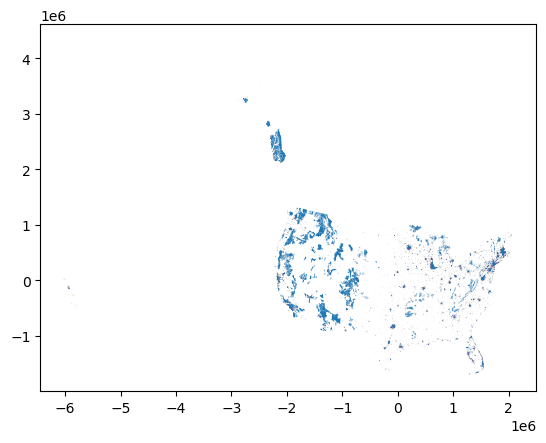

In [11]:
park.plot()

In [12]:
park_noH = gpd.read_file(shapefile_path, header=0)
park_noH

OBJECTID           ParkID  \
0              1     3901000-0001   
1              2     3901000-0002   
2              3     3901000-0003   
3              4     3901000-0004   
4              5     3901000-0005   
...          ...              ...   
136365    136366  4201117720-0014   
136366    136367  4204345056-0014   
136367    136368  4212918968-0012   
136368    136369  4207939792-0006   
136369    136370  4202766736-0009   

                                          Park_Name Park_Desig Park_Owner  \
0                                Hampton Hills Park         LP       CITY   
1                              Frank Boulevard Park         LP       CITY   
2                             Fairlawn Heights Park         LP       CITY   
3                                    Northwest Park         LP       CITY   
4                               Westgate Manor Park         LP       CITY   
...                                             ...        ...        ...   
136365  Nolde Forest Environmental Education Center         SP      State   
136366              Boyd Big Tree Conservation Area         SP      State   
136367                          Keystone State Park         SP      State   
136368                    Frances Slocum State Park         SP      State   
136369                   Black Moshannon State Park         SP      State   

                   Park_Local Park_Manag             Park_Loc_1  Park_Acces  \
0               City of Akron       CITY          City of Akron           3   
1               City of Akron       CITY          City of Akron           3   
2               City of Akron       CITY          City of Akron           3   
3               City of Akron       CITY          City of Akron           3   
4               City of Akron       CITY          City of Akron           3   
...                       ...        ...                    ...         ...   
136365  Bureau of State Parks      State  Bureau of State Parks           3   
136366  Bureau of State Parks      State  Bureau of State Parks           3   
136367  Bureau of State Parks      State  Bureau of State Parks           3   
136368  Bureau of State Parks      State  Bureau of State Parks           3   
136369  Bureau of State Parks      State  Bureau of State Parks           3   

       Park_Statu  Park_Land_ Park_Est_D  Park_Size_           Park_Addre  \
0            Open           1        NaN  317.339342         1285 Bath Rd   
1            Open           1        NaN   20.586117  2086 Stockbridge Rd   
2            Open           1        NaN    9.807055        Fairlawn Blvd   
3            Open           1        NaN    6.322312      1730 Shatto Ave   
4            Open           1        NaN   15.522387          W Market St   
...           ...         ...        ...         ...                  ...   
136365       Open           8       1970  697.478866                  NaN   
136366       Open           8       2021   47.593083                  NaN   
136367       Open           8       1945   57.136256                  NaN   
136368       Open           8       1968  162.559638                  NaN   
136369       Open           8       1937  227.113491                  NaN   

          Park_State Park_Sta_1           Park_Count Park_Cou_1  \
0               Ohio         39        Summit County      39153   
1               Ohio         39        Summit County      39153   
2               Ohio         39        Summit County      39153   
3               Ohio         39        Summit County      39153   
4               Ohio         39        Summit County      39153   
...              ...        ...                  ...        ...   
136365  Pennsylvania         42         Berks County      42011   
136366  Pennsylvania         42       Dauphin County      42043   
136367  Pennsylvania         42  Westmoreland County      42129   
136368  Pennsylvania         42       Luzerne County      42079   
136369  Pennsylvania       

In [13]:
ohlist = park.loc[park['Park_Count']=='Summit County']
ohlist

OBJECTID        ParkID                          Park_Name Park_Desig  \
0              1  3901000-0001                 Hampton Hills Park         LP   
1              2  3901000-0002               Frank Boulevard Park         LP   
2              3  3901000-0003              Fairlawn Heights Park         LP   
3              4  3901000-0004                     Northwest Park         LP   
4              5  3901000-0005                Westgate Manor Park         LP   
...          ...           ...                                ...        ...   
128874    128875  3901000-0119  Ohio and Erie Canal Towpath Trail       LREC   
128875    128876  3901000-0106  Ohio and Erie Canal Towpath Trail       LREC   
128876    128877  3901000-0109  Ohio and Erie Canal Towpath Trail         LP   
128877    128878  3901000-0104  Ohio and Erie Canal Towpath Trail         LP   
129987    129988  3901000-0120                   Valley View Park         LP   

       Park_Owner         Park_Local Park_Manag         Park_Loc_1  \
0            CITY      City of Akron       CITY      City of Akron   
1            CITY      City of Akron       CITY      City of Akron   
2            CITY      City of Akron       CITY      City of Akron   
3            CITY      City of Akron       CITY      City of Akron   
4            CITY      City of Akron       CITY      City of Akron   
...           ...                ...        ...                ...   
128874       CITY      City of Akron       CITY      City of Akron   
128875       CITY      City of Akron       CITY  Summit Metroparks   
128876       CITY      City of Akron       CITY      City of Akron   
128877       CITY      City of Akron       CITY  Summit Metroparks   
129987  NONPROFIT  Summit MetroParks  NONPROFIT  Summit Metroparks   

        Park_Acces Park_Statu  Park_Land_ Park_Est_D  Park_Size_  \
0                3       Open           1        NaN  317.339342   
1                3       Open           1        NaN   20.586117   
2                3       Open           1        NaN    9.807055   
3                3       Open           1        NaN    6.322312   
4                3       Open           1        NaN   15.522387   
...            ...        ...         ...        ...         ...   
128874           3       Open           1        NaN    9.086878   
128875           3       Open           1        NaN   21.108615   
128876           3       Open           1        NaN    0.894190   
128877           3       Open           1        NaN    0.419487   
129987           3       Open           1       2021  183.589170   

                  Park_Addre Park_State Park_Sta_1     Park_Count Park_Cou_1  \
0               1285 Bath Rd       Ohio         39  Summit County      39153   
1        2086 Stockbridge Rd       Ohio         39  Summit County      39153   
2              Fairlawn Blvd       Ohio         39  Summit County      39153   
3            1730 Shatto Ave       Ohio         39  Summit County      39153   
4                W Market St       Ohio         39  Summit County      39153   
...                      ...        ...        ...            ...        ...   
128874  East Exchange Street       Ohio         39  Summit County      39153   
128875      Memorial Parkway       Ohio         39  Summit County      39153   
128876    West Market Street       Ohio         39  Summit County      39153   
128877     West Wilbeth Road       Ohio         39  Summit County      39153   
129987                   NaN       Ohio         39  Summit County      39153   

                 Park_Place Park_Pla_1 Park_Urban Park_Urb_1 Park_Zip  \
0       Cuyahoga Falls city    3919778  Akron, OH      00766    44223   
1                Akron city    3901000  Akron, OH      00766    44313   
2                Akron city    3901000  Akron, OH      00766    44313   
3                Akron city    3901000  Akron, OH      00766    44313   
4                Akron city    3901000  Akron, OH      00766   

In [15]:
# trim the dataframe to 4 columns only
park_trim = park_noH[['Park_State', 'Park_Count','Park_Cou_1','Park_Size_']]
park_trim

Park_State           Park_Count Park_Cou_1  Park_Size_
0               Ohio        Summit County      39153  317.339342
1               Ohio        Summit County      39153   20.586117
2               Ohio        Summit County      39153    9.807055
3               Ohio        Summit County      39153    6.322312
4               Ohio        Summit County      39153   15.522387
...              ...                  ...        ...         ...
136365  Pennsylvania         Berks County      42011  697.478866
136366  Pennsylvania       Dauphin County      42043   47.593083
136367  Pennsylvania  Westmoreland County      42129   57.136256
136368  Pennsylvania       Luzerne County      42079  162.559638
136369  Pennsylvania        Centre County      42027  227.113491

[136370 rows x 4 columns]

In [16]:
# total park size for each county
#park_county = park_trim.groupby(['Park_Cou_1', 'Park_State','Park_Count']).sum()
park_county = park_trim.groupby(['Park_Cou_1', 'Park_State','Park_Count'], axis=0, as_index=False).sum()
park_county

Park_Cou_1 Park_State         Park_Count   Park_Size_
0         01001    Alabama     Autauga County   224.325391
1         01003    Alabama     Baldwin County  5739.581520
2         01005    Alabama     Barbour County   193.405392
3         01007    Alabama        Bibb County    50.854238
4         01009    Alabama      Blount County    33.914520
...         ...        ...                ...          ...
2404      56037    Wyoming  Sweetwater County   921.528506
2405      56039    Wyoming       Teton County    95.900784
2406      56041    Wyoming       Uinta County   223.399611
2407      56043    Wyoming    Washakie County    94.724093
2408      56045    Wyoming      Weston County    23.769319

[2409 rows x 4 columns]

In [152]:
oh_test = park_county.loc[park_county['Park_Count']=='Summit County']
oh_test

Park_Cou_1 Park_State     Park_Count  Park_Size_
230       08117   Colorado  Summit County    8.465482
1618      39153       Ohio  Summit County   54.856392
2142      49043       Utah  Summit County    0.501404

In [17]:
# read the dataframe for county that contains the area for each county
county = pd.read_csv('county_complete.csv')
county

fips    state               name   pop2000  pop2010   pop2011  \
0      1001  Alabama     Autauga County   43671.0    54571   55199.0   
1      1003  Alabama     Baldwin County  140415.0   182265  186534.0   
2      1005  Alabama     Barbour County   29038.0    27457   27351.0   
3      1007  Alabama        Bibb County   20826.0    22915   22745.0   
4      1009  Alabama      Blount County   51024.0    57322   57562.0   
...     ...      ...                ...       ...      ...       ...   
3137  56037  Wyoming  Sweetwater County   37613.0    43806   44013.0   
3138  56039  Wyoming       Teton County   18251.0    21294   21476.0   
3139  56041  Wyoming       Uinta County   19742.0    21118   20899.0   
3140  56043  Wyoming    Washakie County    8289.0     8533    8460.0   
3141  56045  Wyoming      Weston County    6644.0     7208    7141.0   

       pop2012   pop2013   pop2014   pop2015   pop2016   pop2017  \
0      54927.0   54695.0   54864.0   54838.0   55278.0   55504.0   
1     190048.0  194736.0  199064.0  202863.0  207509.0  212628.0   
2      27175.0   26947.0   26749.0   26264.0   25774.0   25270.0   
3      22658.0   22503.0   22533.0   22561.0   22633.0   22668.0   
4      57595.0   57623.0   57546.0   57590.0   57562.0   58013.0   
...        ...       ...       ...       ...       ...       ...   
3137   45042.0   45145.0   44981.0   44732.0   44245.0   43534.0   
3138   21709.0   22326.0   22817.0   23029.0   23180.0   23265.0   
3139   20999.0   20960.0   20845.0   20780.0   20711.0   20495.0   
3140    8421.0    8427.0    8288.0    8296.0    8188.0    8064.0   
3141    7074.0    7136.0    7142.0    7181.0    7198.0    6927.0   

      age_under_5_2010  age_under_5_2017  age_under_18_2010  age_over_65_2010  \
0                  6.6               5.7               26.8              12.0   
1                  6.1               5.7               23.0              16.8   
2                  6.2               5.5               21.9              14.2   
3                  6.0               5.7               22.7              12.7   
4                  6.3               6.1               24.6              14.7   
...                ...               ...                ...               ...   
3137               8.4               7.2               27.1               8.3   
3138               6.0               5.3               19.1               9.9   
3139               8.4               7.5               30.2               8.9   
3140               7.0               5.5               25.5              17.7   
3141               5.7               5.4               21.8              15.9   

      age_over_65_2017  median_age_2017  female_2010  white_2010  black_2010  \
0                 14.3             37.8         51.3        78.5        17.7   
1                 19.0             42.6         51.1        85.7         9.4   
2                 17.4             39.7         46.9        48.0        46.9   
3                 15.1             39.8         46.3        75.8        22.0   
4                 17.4             40.9         50.5        92.6         1.3   
...                ...              ...          ...         ...         ...   
3137               9.7             34.0         47.8        88.5         1.0   
3138              12.7             39.0         47.4        88.4         0.2   
3139              11.7             35.1         49.5        92.4         0.3   
3140              20.0             43.4         50.1        91.4         0.3   
3141              18.2             42.2         47.4        95.5         0.3   

      black_2017  native_2010  native_2017  asian_2010  asian_2017  \
0           9.55          0.4         0.15         0.9        0.47   
1           4.77          0.7         0.41         0.7        0.35   
2          24.02          0.4         0.10         0.4        0.31   
3          11.03          0.3         0.18         0.1        0.00   
4           0.79          0.5         0.1

In [18]:
# dataframe that has size of each county(square miles)
area = county[['fips', 'state','name','area_2010']]
area

fips    state               name  area_2010
0      1001  Alabama     Autauga County     594.44
1      1003  Alabama     Baldwin County    1589.78
2      1005  Alabama     Barbour County     884.88
3      1007  Alabama        Bibb County     622.58
4      1009  Alabama      Blount County     644.78
...     ...      ...                ...        ...
3137  56037  Wyoming  Sweetwater County   10426.65
3138  56039  Wyoming       Teton County    3995.38
3139  56041  Wyoming       Uinta County    2081.26
3140  56043  Wyoming    Washakie County    2238.55
3141  56045  Wyoming      Weston County    2398.09

[3142 rows x 4 columns]

In [19]:
# dataframe that contains all the counties in US (3142 counties)
county_total = county[['name']]
county_total

name
0        Autauga County
1        Baldwin County
2        Barbour County
3           Bibb County
4         Blount County
...                 ...
3137  Sweetwater County
3138       Teton County
3139       Uinta County
3140    Washakie County
3141      Weston County

[3142 rows x 1 columns]

In [20]:
# dataframe that contains all the counties that have recorded to have parks (2409)
county_park = park_county[['Park_Count']]
county_park

Park_Count
0        Autauga County
1        Baldwin County
2        Barbour County
3           Bibb County
4         Blount County
...                 ...
2404  Sweetwater County
2405       Teton County
2406       Uinta County
2407    Washakie County
2408      Weston County

[2409 rows x 1 columns]

In [21]:
# figure out the counties that are not recorded (supposed to be 733 counties) 
leftOut = county_total[~county_total.apply(tuple, 1).isin(county_park.apply(tuple, 1))] 
leftOut

name
18                  Coosa County
20               Crenshaw County
65                 Wilcox County
67        Aleutians East Borough
68    Aleutians West Census Area
...                          ...
3093                Pepin County
3097                Price County
3110                Vilas County
3132             Niobrara County
3136             Sublette County

[381 rows x 1 columns]

In [22]:
county_total_wS = county[['name', 'state']]
county_park_wS = park_county[['Park_Count', 'Park_State']]
#county_park_wS
#county_total_wS

In [23]:
# figure out the counties that are recorded to have parks  
leftOut_wS = county_total_wS[county_total_wS.apply(tuple, 1).isin(county_park_wS.apply(tuple, 1))] 
leftOut_wS

name    state
0        Autauga County  Alabama
1        Baldwin County  Alabama
2        Barbour County  Alabama
3           Bibb County  Alabama
4         Blount County  Alabama
...                 ...      ...
3137  Sweetwater County  Wyoming
3138       Teton County  Wyoming
3139       Uinta County  Wyoming
3140    Washakie County  Wyoming
3141      Weston County  Wyoming

[2405 rows x 2 columns]

In [24]:
# convert acres to square miles
park_county['Park_Size_'] = park_county['Park_Size_'].div(640)
park_county

Park_Cou_1 Park_State         Park_Count  Park_Size_
0         01001    Alabama     Autauga County    0.350508
1         01003    Alabama     Baldwin County    8.968096
2         01005    Alabama     Barbour County    0.302196
3         01007    Alabama        Bibb County    0.079460
4         01009    Alabama      Blount County    0.052991
...         ...        ...                ...         ...
2404      56037    Wyoming  Sweetwater County    1.439888
2405      56039    Wyoming       Teton County    0.149845
2406      56041    Wyoming       Uinta County    0.349062
2407      56043    Wyoming    Washakie County    0.148006
2408      56045    Wyoming      Weston County    0.037140

[2409 rows x 4 columns]

In [25]:
# merge two dataframes: one with the area and one with the the park size for each county
new_df =  pd.merge(area, park_county,  how='left', left_on=['state','name'], right_on = ['Park_State','Park_Count'])
#new_df =  pd.merge(park_county, area,  how='left', left_on=['Park_State','Park_Count'], right_on = ['state','name'])
new_df

fips    state               name  area_2010 Park_Cou_1 Park_State  \
0      1001  Alabama     Autauga County     594.44      01001    Alabama   
1      1003  Alabama     Baldwin County    1589.78      01003    Alabama   
2      1005  Alabama     Barbour County     884.88      01005    Alabama   
3      1007  Alabama        Bibb County     622.58      01007    Alabama   
4      1009  Alabama      Blount County     644.78      01009    Alabama   
...     ...      ...                ...        ...        ...        ...   
3137  56037  Wyoming  Sweetwater County   10426.65      56037    Wyoming   
3138  56039  Wyoming       Teton County    3995.38      56039    Wyoming   
3139  56041  Wyoming       Uinta County    2081.26      56041    Wyoming   
3140  56043  Wyoming    Washakie County    2238.55      56043    Wyoming   
3141  56045  Wyoming      Weston County    2398.09      56045    Wyoming   

             Park_Count  Park_Size_  
0        Autauga County    0.350508  
1        Baldwin County    8.968096  
2        Barbour County    0.302196  
3           Bibb County    0.079460  
4         Blount County    0.052991  
...                 ...         ...  
3137  Sweetwater County    1.439888  
3138       Teton County    0.149845  
3139       Uinta County    0.349062  
3140    Washakie County    0.148006  
3141      Weston County    0.037140  

[3142 rows x 8 columns]

In [26]:
# find percentage of park area for each each county 
new_df['Park_Size_'] = (new_df['Park_Size_'].div( new_df['area_2010'])).mul(100) 
new_df

fips    state               name  area_2010 Park_Cou_1 Park_State  \
0      1001  Alabama     Autauga County     594.44      01001    Alabama   
1      1003  Alabama     Baldwin County    1589.78      01003    Alabama   
2      1005  Alabama     Barbour County     884.88      01005    Alabama   
3      1007  Alabama        Bibb County     622.58      01007    Alabama   
4      1009  Alabama      Blount County     644.78      01009    Alabama   
...     ...      ...                ...        ...        ...        ...   
3137  56037  Wyoming  Sweetwater County   10426.65      56037    Wyoming   
3138  56039  Wyoming       Teton County    3995.38      56039    Wyoming   
3139  56041  Wyoming       Uinta County    2081.26      56041    Wyoming   
3140  56043  Wyoming    Washakie County    2238.55      56043    Wyoming   
3141  56045  Wyoming      Weston County    2398.09      56045    Wyoming   

             Park_Count  Park_Size_  
0        Autauga County    0.058964  
1        Baldwin County    0.564109  
2        Barbour County    0.034151  
3           Bibb County    0.012763  
4         Blount County    0.008219  
...                 ...         ...  
3137  Sweetwater County    0.013810  
3138       Teton County    0.003750  
3139       Uinta County    0.016772  
3140    Washakie County    0.006612  
3141      Weston County    0.001549  

[3142 rows x 8 columns]

In [27]:
scaleTest = 0.058964/10**-1
scaleTest

0.5896399999999999

In [28]:
minVal = new_df['Park_Size_'].min()
minVal

2.3591181270757338e-05

In [29]:
NaN = new_df[new_df['Park_Size_'].isna()]
NaN

fips      state             name  area_2010 Park_Cou_1 Park_State  \
11     1023    Alabama   Choctaw County     913.50        NaN        NaN   
13     1027    Alabama      Clay County     603.96        NaN        NaN   
14     1029    Alabama  Cleburne County     560.10        NaN        NaN   
18     1037    Alabama     Coosa County     650.93        NaN        NaN   
20     1041    Alabama  Crenshaw County     608.84        NaN        NaN   
...     ...        ...              ...        ...        ...        ...   
3110  55125  Wisconsin     Vilas County     856.60        NaN        NaN   
3120  56003    Wyoming  Big Horn County    3137.10        NaN        NaN   
3124  56011    Wyoming     Crook County    2854.41        NaN        NaN   
3132  56027    Wyoming  Niobrara County    2626.04        NaN        NaN   
3136  56035    Wyoming  Sublette County    4886.54        NaN        NaN   

     Park_Count  Park_Size_  
11          NaN         NaN  
13          NaN         NaN  
14          NaN         NaN  
18          NaN         NaN  
20          NaN         NaN  
...         ...         ...  
3110        NaN         NaN  
3120        NaN         NaN  
3124        NaN         NaN  
3132        NaN         NaN  
3136        NaN         NaN  

[737 rows x 8 columns]

In [30]:
# scale perncentage of green space in each counties
new_df['Park_Size_'] = new_df['Park_Size_'].div(10**-1)
new_df

fips    state               name  area_2010 Park_Cou_1 Park_State  \
0      1001  Alabama     Autauga County     594.44      01001    Alabama   
1      1003  Alabama     Baldwin County    1589.78      01003    Alabama   
2      1005  Alabama     Barbour County     884.88      01005    Alabama   
3      1007  Alabama        Bibb County     622.58      01007    Alabama   
4      1009  Alabama      Blount County     644.78      01009    Alabama   
...     ...      ...                ...        ...        ...        ...   
3137  56037  Wyoming  Sweetwater County   10426.65      56037    Wyoming   
3138  56039  Wyoming       Teton County    3995.38      56039    Wyoming   
3139  56041  Wyoming       Uinta County    2081.26      56041    Wyoming   
3140  56043  Wyoming    Washakie County    2238.55      56043    Wyoming   
3141  56045  Wyoming      Weston County    2398.09      56045    Wyoming   

             Park_Count  Park_Size_  
0        Autauga County    0.589645  
1        Baldwin County    5.641093  
2        Barbour County    0.341511  
3           Bibb County    0.127630  
4         Blount County    0.082185  
...                 ...         ...  
3137  Sweetwater County    0.138097  
3138       Teton County    0.037505  
3139       Uinta County    0.167717  
3140    Washakie County    0.066117  
3141      Weston County    0.015487  

[3142 rows x 8 columns]

In [31]:
# simplify dataframe => set NaN val to 0 
new_df2 = new_df.fillna(0)
new_df2
#NaN = new_df2[new_df['Park_Size_'].isna()]
#NaN

fips    state               name  area_2010 Park_Cou_1 Park_State  \
0      1001  Alabama     Autauga County     594.44      01001    Alabama   
1      1003  Alabama     Baldwin County    1589.78      01003    Alabama   
2      1005  Alabama     Barbour County     884.88      01005    Alabama   
3      1007  Alabama        Bibb County     622.58      01007    Alabama   
4      1009  Alabama      Blount County     644.78      01009    Alabama   
...     ...      ...                ...        ...        ...        ...   
3137  56037  Wyoming  Sweetwater County   10426.65      56037    Wyoming   
3138  56039  Wyoming       Teton County    3995.38      56039    Wyoming   
3139  56041  Wyoming       Uinta County    2081.26      56041    Wyoming   
3140  56043  Wyoming    Washakie County    2238.55      56043    Wyoming   
3141  56045  Wyoming      Weston County    2398.09      56045    Wyoming   

             Park_Count  Park_Size_  
0        Autauga County    0.589645  
1        Baldwin County    5.641093  
2        Barbour County    0.341511  
3           Bibb County    0.127630  
4         Blount County    0.082185  
...                 ...         ...  
3137  Sweetwater County    0.138097  
3138       Teton County    0.037505  
3139       Uinta County    0.167717  
3140    Washakie County    0.066117  
3141      Weston County    0.015487  

[3142 rows x 8 columns]

In [32]:
adamCounty = new_df2.loc[new_df2['name']=='Adams County']
pa = new_df2.loc[new_df2['state']=='Pennsylvania']
pa

fips         state                 name  area_2010 Park_Cou_1  \
2244  42001  Pennsylvania         Adams County     518.67      42001   
2245  42003  Pennsylvania     Allegheny County     730.08      42003   
2246  42005  Pennsylvania     Armstrong County     653.20      42005   
2247  42007  Pennsylvania        Beaver County     434.71      42007   
2248  42009  Pennsylvania       Bedford County    1012.30      42009   
...     ...           ...                  ...        ...        ...   
2306  42125  Pennsylvania    Washington County     856.99      42125   
2307  42127  Pennsylvania         Wayne County     725.60      42127   
2308  42129  Pennsylvania  Westmoreland County    1027.55      42129   
2309  42131  Pennsylvania       Wyoming County     397.32      42131   
2310  42133  Pennsylvania          York County     904.18      42133   

        Park_State           Park_Count  Park_Size_  
2244  Pennsylvania         Adams County    0.654625  
2245  Pennsylvania     Allegheny County   54.812274  
2246  Pennsylvania     Armstrong County    1.605679  
2247  Pennsylvania        Beaver County   14.347630  
2248  Pennsylvania       Bedford County   11.492698  
...            ...                  ...         ...  
2306  Pennsylvania    Washington County    8.297252  
2307  Pennsylvania         Wayne County    2.512743  
2308  Pennsylvania  Westmoreland County   16.660480  
2309  Pennsylvania       Wyoming County    0.342472  
2310  Pennsylvania          York County   14.169049  

[67 rows x 8 columns]

In [33]:
# map - green space
import branca

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/main/examples/data"
)

county_geo = f"{url}/us_counties_20m_topo.json"

colorscale = branca.colormap.linear.YlGn_09.scale(0, 40)

park_percent = new_df2.set_index("fips")["Park_Size_"]

def style_function(feature):
    park_m = park_percent.get(int(feature["id"][-5:]), None)
    return {
        "fillOpacity": 0.5,
        "weight": 0,
        "fillColor": "black" if park_m is None else colorscale(park_m),
    }

m = folium.Map(location=[48, -102], tiles="cartodbpositron", zoom_start=3)

folium.TopoJson(
    json.loads(requests.get(county_geo).text),
    "objects.us_counties_20m",
    style_function=style_function,
).add_to(m)


m



In [34]:
# visualize map of cumulative cases
cases = pd.read_csv(
    'covid_confirmed_usafacts (1).csv',
    header=None)
cases_h = pd.read_csv(
    'covid_confirmed_usafacts (1).csv',
    parse_dates=True)
deaths = pd.read_csv(
    'covid_deaths_usafacts (1).csv',
    header=None)

deaths_h = pd.read_csv(
    'covid_deaths_usafacts (1).csv',
    parse_dates=True)



C:\Users\VU HONG ANH\AppData\Local\Temp\ipykernel_11900\689114726.py:2: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254

In [35]:
cases_h

countyFIPS            County Name State  StateFIPS  2020-01-22  \
0              0  Statewide Unallocated    AL          1           0   
1           1001        Autauga County     AL          1           0   
2           1003        Baldwin County     AL          1           0   
3           1005        Barbour County     AL          1           0   
4           1007           Bibb County     AL          1           0   
...          ...                    ...   ...        ...         ...   
3188       56037     Sweetwater County     WY         56           0   
3189       56039          Teton County     WY         56           0   
3190       56041          Uinta County     WY         56           0   
3191       56043       Washakie County     WY         56           0   
3192       56045         Weston County     WY         56           0   

      2020-01-23  2020-01-24  2020-01-25  2020-01-26  2020-01-27  2020-01-28  \
0              0           0           0           0           0           0   
1              0           0           0           0           0           0   
2              0           0           0           0           0           0   
3              0           0           0           0           0           0   
4              0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
3188           0           0           0           0           0           0   
3189           0           0           0           0           0           0   
3190           0           0           0           0           0           0   
3191           0           0           0           0           0           0   
3192           0           0           0           0           0           0   

      2020-01-29  2020-01-30  2020-01-31  2020-02-01  2020-02-02  2020-02-03  \
0              0           0           0           0           0           0   
1              0           0           0           0           0           0   
2              0           0           0           0           0           0   
3              0           0           0           0           0           0   
4              0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
3188           0           0           0           0           0           0   
3189           0           0           0           0           0           0   
3190           0           0           0           0           0           0   
3191           0           0           0           0           0           0   
3192           0           0           0           0           0           0   

      2020-02-04  2020-02-05  2020-02-06  2020-02-07  2020-02-08  2020-02-09  \
0              0           0           0           0           0           0   
1              0           0           0           0           0           0   
2              0           0           0           0           0           0   
3              0           0           0           0           0           0   
4              0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
3188           0           0           0           0           0           0   
3189           0           0           0           0           0           0   
3190           0           0           0           0           0           0   
3191           0           0           0           0           0           0   
3192           0           0           0           0           0           0   

      2020-02-10  2020-02-11  2020-02-12  2020-02-13  2020-02-14  2020-02-15  \
0              0           0           0           0           0           0   
1              0           0           0           0           0           0   
2              0  

In [36]:
#map -cumulative cases
colorscale = branca.colormap.linear.YlOrRd_09.scale(0, 50e3)

cases_total = cases_h.set_index("countyFIPS")["2023-04-29"]

def style_function(feature):
    cases_m = cases_total.get(int(feature["id"][-5:]), None)
    return {
        "fillOpacity": 0.5,
        "weight": 0,
        "fillColor": "black" if cases_m is None else colorscale(cases_m),
    }

m1 = folium.Map(location=[48, -102], tiles="cartodbpositron", zoom_start=3)

folium.TopoJson(
    json.loads(requests.get(county_geo).text),
    "objects.us_counties_20m",
    style_function=style_function,
).add_to(m1)


m1


In [37]:
deaths_h

countyFIPS            County Name State  StateFIPS  2020-01-22  \
0              0  Statewide Unallocated    AL          1           0   
1           1001        Autauga County     AL          1           0   
2           1003        Baldwin County     AL          1           0   
3           1005        Barbour County     AL          1           0   
4           1007           Bibb County     AL          1           0   
...          ...                    ...   ...        ...         ...   
3188       56037     Sweetwater County     WY         56           0   
3189       56039          Teton County     WY         56           0   
3190       56041          Uinta County     WY         56           0   
3191       56043       Washakie County     WY         56           0   
3192       56045         Weston County     WY         56           0   

      2020-01-23  2020-01-24  2020-01-25  2020-01-26  2020-01-27  2020-01-28  \
0              0           0           0           0           0           0   
1              0           0           0           0           0           0   
2              0           0           0           0           0           0   
3              0           0           0           0           0           0   
4              0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
3188           0           0           0           0           0           0   
3189           0           0           0           0           0           0   
3190           0           0           0           0           0           0   
3191           0           0           0           0           0           0   
3192           0           0           0           0           0           0   

      2020-01-29  2020-01-30  2020-01-31  2020-02-01  2020-02-02  2020-02-03  \
0              0           0           0           0           0           0   
1              0           0           0           0           0           0   
2              0           0           0           0           0           0   
3              0           0           0           0           0           0   
4              0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
3188           0           0           0           0           0           0   
3189           0           0           0           0           0           0   
3190           0           0           0           0           0           0   
3191           0           0           0           0           0           0   
3192           0           0           0           0           0           0   

      2020-02-04  2020-02-05  2020-02-06  2020-02-07  2020-02-08  2020-02-09  \
0              0           0           0           0           0           0   
1              0           0           0           0           0           0   
2              0           0           0           0           0           0   
3              0           0           0           0           0           0   
4              0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
3188           0           0           0           0           0           0   
3189           0           0           0           0           0           0   
3190           0           0           0           0           0           0   
3191           0           0           0           0           0           0   
3192           0           0           0           0           0           0   

      2020-02-10  2020-02-11  2020-02-12  2020-02-13  2020-02-14  2020-02-15  \
0              0           0           0           0           0           0   
1              0           0           0           0           0           0   
2              0  

In [38]:
#map -death cases
colorscale = branca.colormap.linear.YlOrRd_09.scale(0, 50e1)

deaths_total = deaths_h.set_index("countyFIPS")["2023-04-29"]

def style_function(feature):
    deaths_m = deaths_total.get(int(feature["id"][-5:]), None)
    return {
        "fillOpacity": 0.5,
        "weight": 0,
        "fillColor": "black" if deaths_m is None else colorscale(deaths_m),
    }

m2 = folium.Map(location=[48, -102], tiles="cartodbpositron", zoom_start=3)

folium.TopoJson(
    json.loads(requests.get(county_geo).text),
    "objects.us_counties_20m",
    style_function=style_function,
).add_to(m2)


m2

In [39]:
# CHECK THE RURAL COUNTIES
#OrangeburgCounty = new_df2.loc[new_df2['name']=='Orangeburg County']
#pa = new_df2.loc[new_df2['state']=='Pennsylvania']
#OrangeburgCounty
ButteCounty = new_df2.loc[new_df2['name']=='Butte County']
ButteCounty


fips         state          name  area_2010 Park_Cou_1    Park_State  \
189    6007    California  Butte County    1636.46      06007    California   
562   16023         Idaho  Butte County    2231.67          0             0   
2370  46019  South Dakota  Butte County    2249.90      46019  South Dakota   

        Park_Count  Park_Size_  
189   Butte County   29.016775  
562              0    0.000000  
2370  Butte County    0.073475

In [40]:
#OrangeburgCounty_cases = cases_h.loc[cases_h['County Name']=='Orangeburg County ']
#pa = new_df2.loc[new_df2['state']=='Pennsylvania']
#OrangeburgCounty_cases
LickingCounty_cases = cases_h.loc[cases_h['County Name']=='Licking County ']
LickingCounty_cases

countyFIPS      County Name State  StateFIPS  2020-01-22  2020-01-23  \
2123       39089  Licking County     OH         39           0           0   

      2020-01-24  2020-01-25  2020-01-26  2020-01-27  2020-01-28  2020-01-29  \
2123           0           0           0           0           0           0   

      2020-01-30  2020-01-31  2020-02-01  2020-02-02  2020-02-03  2020-02-04  \
2123           0           0           0           0           0           0   

      2020-02-05  2020-02-06  2020-02-07  2020-02-08  2020-02-09  2020-02-10  \
2123           0           0           0           0           0           0   

      2020-02-11  2020-02-12  2020-02-13  2020-02-14  2020-02-15  2020-02-16  \
2123           0           0           0           0           0           0   

      2020-02-17  2020-02-18  2020-02-19  2020-02-20  2020-02-21  2020-02-22  \
2123           0           0           0           0           0           0   

      2020-02-23  2020-02-24  2020-02-25  2020-02-26  2020-02-27  2020-02-28  \
2123           0           0           0           0           0           0   

      2020-02-29  2020-03-01  2020-03-02  2020-03-03  2020-03-04  2020-03-05  \
2123           0           0           0           0           0           0   

      2020-03-06  2020-03-07  2020-03-08  2020-03-09  2020-03-10  2020-03-11  \
2123           0           0           0           0           0           0   

      2020-03-12  2020-03-13  2020-03-14  2020-03-15  2020-03-16  2020-03-17  \
2123           0           0           0           0           0           0   

      2020-03-18  2020-03-19  2020-03-20  2020-03-21  2020-03-22  2020-03-23  \
2123           0           0           0           1           1           1   

      2020-03-24  2020-03-25  2020-03-26  2020-03-27  2020-03-28  2020-03-29  \
2123           2           3           5          10          14          15   

      2020-03-30  2020-03-31  2020-04-01  2020-04-02  2020-04-03  2020-04-04  \
2123          21          24          24          30          41          50   

      2020-04-05  2020-04-06  2020-04-07  2020-04-08  2020-04-09  2020-04-10  \
2123          55          57          61          64          78          79   

      2020-04-11  2020-04-12  2020-04-13  2020-04-14  2020-04-15  2020-04-16  \
2123          80          83          86          86          88          92   

      2020-04-17  2020-04-18  2020-04-19  2020-04-20  2020-04-21  2020-04-22  \
2123          94          94         100         100         102         103   

      2020-04-23  2020-04-24  2020-04-25  2020-04-26  2020-04-27  2020-04-28  \
2123         104         105         108         108         110         114   

      2020-04-29  2020-04-30  2020-05-01  2020-05-02  2020-05-03  2020-05-04  \
2123         115         118         121         122         125         130   

      2020-05-05  2020-05-06  2020-05-07  2020-05-08  2020-05-09  2020-05-10  \
2123         133         137         146         150         162         162   

      2020-05-11  2020-05-12  2020-05-13  2020-05-14  2020-05-15  2020-05-16  \
2123         164         172         175         180         182         184   

      2020-05-17  2020-05-18  2020-05-19  2020-05-20  2020-05-21  2020-05-22  \
2123         185         190         190         197         199         200   

      2020-05-23  2020-05-24  2020-05-25  2020-05-26  2020-05-27  2020-05-28  \
2123         201         204         207         214         218         222   

      2020-05-29  2020-05-30  2020-05-31  2020-06-01  2020-06-02  2020-06-03  \
2123         230         243         248         249         258         265   

      2020-06-04  2020-06-05  2020-06-06  2020-06-07  2020-06-08  2020-06-09  \
2123         267         271         275         277         280         284   

      2020-06-10  2020-06-11  2020-06-12  2020-06-13  2020-06-14  2020-06-15  \
2123         285         287         297         305         312  

In [41]:
cases_final = cases_h[['countyFIPS', 'County Name', 'State','2023-04-29']]
cases_final

countyFIPS            County Name State  2023-04-29
0              0  Statewide Unallocated    AL           0
1           1001        Autauga County     AL       19893
2           1003        Baldwin County     AL       70420
3           1005        Barbour County     AL        7575
4           1007           Bibb County     AL        8136
...          ...                    ...   ...         ...
3188       56037     Sweetwater County     WY       12544
3189       56039          Teton County     WY       12162
3190       56041          Uinta County     WY        6437
3191       56043       Washakie County     WY        2702
3192       56045         Weston County     WY        1909

[3193 rows x 4 columns]

In [42]:
merge2 =  pd.merge(cases_final, new_df2,  how='left', left_on=['countyFIPS'], right_on = ['fips'])
merge2
#NaN2 = merge2[merge2['Park_Size_'].isna()]
#NaN2


countyFIPS            County Name State  2023-04-29     fips    state  \
0              0  Statewide Unallocated    AL           0      NaN      NaN   
1           1001        Autauga County     AL       19893   1001.0  Alabama   
2           1003        Baldwin County     AL       70420   1003.0  Alabama   
3           1005        Barbour County     AL        7575   1005.0  Alabama   
4           1007           Bibb County     AL        8136   1007.0  Alabama   
...          ...                    ...   ...         ...      ...      ...   
3188       56037     Sweetwater County     WY       12544  56037.0  Wyoming   
3189       56039          Teton County     WY       12162  56039.0  Wyoming   
3190       56041          Uinta County     WY        6437  56041.0  Wyoming   
3191       56043       Washakie County     WY        2702  56043.0  Wyoming   
3192       56045         Weston County     WY        1909  56045.0  Wyoming   

                   name  area_2010 Park_Cou_1 Park_State         Park_Count  \
0                   NaN        NaN        NaN        NaN                NaN   
1        Autauga County     594.44      01001    Alabama     Autauga County   
2        Baldwin County    1589.78      01003    Alabama     Baldwin County   
3        Barbour County     884.88      01005    Alabama     Barbour County   
4           Bibb County     622.58      01007    Alabama        Bibb County   
...                 ...        ...        ...        ...                ...   
3188  Sweetwater County   10426.65      56037    Wyoming  Sweetwater County   
3189       Teton County    3995.38      56039    Wyoming       Teton County   
3190       Uinta County    2081.26      56041    Wyoming       Uinta County   
3191    Washakie County    2238.55      56043    Wyoming    Washakie County   
3192      Weston County    2398.09      56045    Wyoming      Weston County   

      Park_Size_  
0            NaN  
1       0.589645  
2       5.641093  
3       0.341511  
4       0.127630  
...          ...  
3188    0.138097  
3189    0.037505  
3190    0.167717  
3191    0.066117  
3192    0.015487  

[3193 rows x 12 columns]

In [43]:
merge_final = merge2[['countyFIPS', 'County Name', 'state','2023-04-29','Park_Size_']]
merge_final
#NassauCounty = merge_final.loc[merge_final['County Name']=='Nassau County ']
#HarrisCounty = merge_final.loc[merge_final['County Name']=='Harris County ']
#BostonCounty = merge_final.loc[merge_final['County Name']=='Ross County ']
#BostonCounty

countyFIPS            County Name    state  2023-04-29  Park_Size_
0              0  Statewide Unallocated      NaN           0         NaN
1           1001        Autauga County   Alabama       19893    0.589645
2           1003        Baldwin County   Alabama       70420    5.641093
3           1005        Barbour County   Alabama        7575    0.341511
4           1007           Bibb County   Alabama        8136    0.127630
...          ...                    ...      ...         ...         ...
3188       56037     Sweetwater County   Wyoming       12544    0.138097
3189       56039          Teton County   Wyoming       12162    0.037505
3190       56041          Uinta County   Wyoming        6437    0.167717
3191       56043       Washakie County   Wyoming        2702    0.066117
3192       56045         Weston County   Wyoming        1909    0.015487

[3193 rows x 5 columns]

In [44]:
# data for urban counties (sort in ascending order based on Park_Size)
urban = merge_final.loc[merge_final['countyFIPS'].isin([36059, 48201, 6037, 42101,25025])]
urban_sort = urban.sort_values(by=['Park_Size_'], ascending=True)
urban_sort

countyFIPS           County Name          state  2023-04-29  Park_Size_
2667       48201        Harris County           Texas     1318892   56.508657
1890       36059        Nassau County        New York      553715   94.515056
2333       42101  Philadelphia County    Pennsylvania      396893  129.537572
1251       25025       Suffolk County   Massachusetts      269265  167.032410
209         6037   Los Angeles County      California     3515857  320.048065

In [45]:
# data for rural counties (sort in ascending order based on Park_Size)
rural = merge_final.loc[merge_final['countyFIPS'].isin([45075, 42001, 39089, 30017,39141])]
rural_sort = rural.sort_values(by=['Park_Size_'], ascending=True)
rural_sort

countyFIPS         County Name           state  2023-04-29  Park_Size_
1633       30017      Custer County          Montana        3549    0.191149
2394       45075  Orangeburg County   South Carolina       23425    0.294430
2283       42001       Adams County     Pennsylvania       32019    0.654625
2149       39141        Ross County             Ohio       25315    1.302520
2123       39089     Licking County             Ohio       53396    2.648698

In [46]:
# data for all counties (sort in ascending order based on Park_Size)
merge_final_sort = merge_final.sort_values(by=['Park_Size_'], ascending=True)

#notUse = merge_final_sort[(merge_final_sort['Park_Size_'] == 0.0) | (merge_final_sort['Park_Size_'] == 'NaN') ].index
#merge_final_sort.drop(notUse , inplace=True)
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_rows', 40) 
#merge_final_sort

#drop NaN values
merge_final_sort = merge_final_sort.dropna()

#drop 0.0 values
notUse = merge_final_sort[(merge_final_sort['Park_Size_'] == 0.0)].index
merge_final_sort.drop(notUse , inplace=True)

merge_final_sort


countyFIPS                 County Name     state  2023-04-29  \
86          2180           Nome Census Area     Alaska        7641   
87          2185        North Slope Borough     Alaska        4965   
2264       41037                Lake County     Oregon        1403   
72          2050         Bethel Census Area     Alaska       13313   
600        16073              Owyhee County      Idaho        2631   
...          ...                         ...       ...         ...   
591        16055            Kootenai County      Idaho       47607   
299         8097              Pitkin County   Colorado        6693   
1555       29093                Iron County   Missouri        2713   
310         8119              Teller County   Colorado        5850   
79          2110  City and Borough of Juneau    Alaska       11352   

       Park_Size_  
86       0.000236  
87       0.000299  
2264     0.000480  
72       0.000492  
600      0.000525  
...           ...  
591   2952.170882  
299   3677.854198  
1555  4275.457800  
310   7434.614202  
79    9673.742951  

[2405 rows x 5 columns]

In [47]:
merge_head = merge_final_sort.head(300)
merge_tail = merge_final_sort.tail(200)
merge_tail

countyFIPS                 County Name         state  2023-04-29  \
2991       51760            City of Richmond      Virginia       61037   
2296       42027              Centre County   Pennsylvania       44617   
118         5007              Benton County       Arkansas       77493   
2096       39035            Cuyahoga County           Ohio      355671   
2754       48375              Potter County          Texas       34341   
...          ...                         ...           ...         ...   
591        16055            Kootenai County          Idaho       47607   
299         8097              Pitkin County       Colorado        6693   
1555       29093                Iron County       Missouri        2713   
310         8119              Teller County       Colorado        5850   
79          2110  City and Borough of Juneau        Alaska       11352   

       Park_Size_  
2991    71.661784  
2296    71.763577  
118     73.250615  
2096    73.322114  
2754    74.103136  
...           ...  
591   2952.170882  
299   3677.854198  
1555  4275.457800  
310   7434.614202  
79    9673.742951  

[200 rows x 5 columns]

<Axes: xlabel='Park_Size_', ylabel='2023-04-29'>

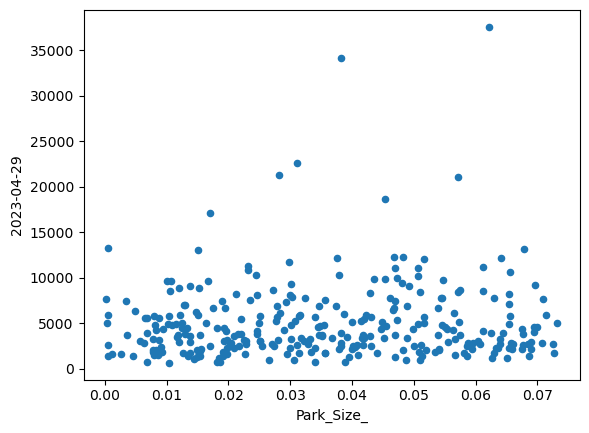

In [48]:
#scatter plot for the first 300 counties in the dataframe
merge_head.plot.scatter(x = 'Park_Size_', y = '2023-04-29', s = 20)

<Axes: xlabel='Park_Size_', ylabel='2023-04-29'>

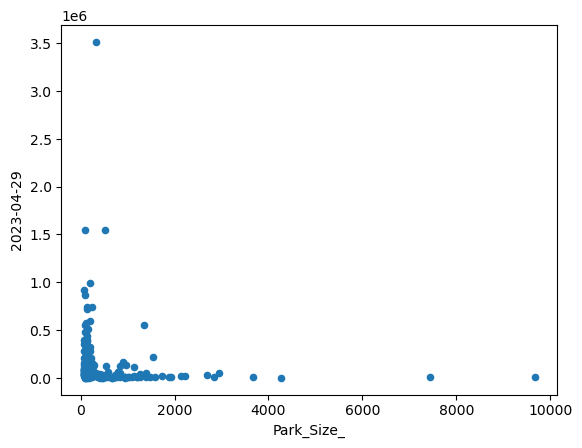

In [49]:
#scatter plot for the last 300 counties in the dataframe
merge_tail.plot.scatter(x = 'Park_Size_', y = '2023-04-29', s = 20)

<Axes: xlabel='Park_Size_', ylabel='2023-04-29'>

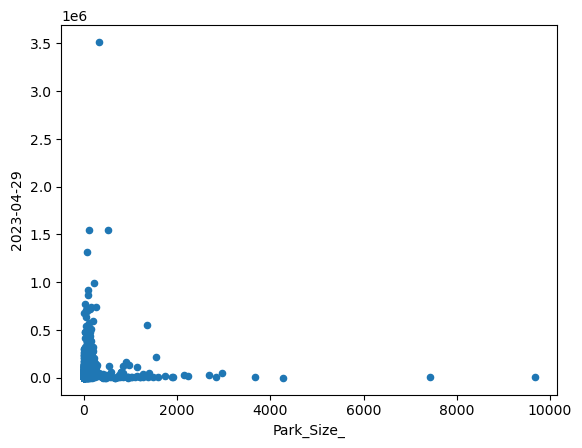

In [50]:
# scatterplot that percentage of park size on the x-axis and cumulative cases on the y-axis for all the counties
merge_final_sort.plot.scatter(x = 'Park_Size_', y = '2023-04-29', s = 20)
#merge_final_sort

In [51]:
# make the cases per capita
pop = pd.read_csv(
    'https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_county_population_usafacts.csv')
pop

countyFIPS            County Name State  population
0              0  Statewide Unallocated    AL           0
1           1001         Autauga County    AL       55869
2           1003         Baldwin County    AL      223234
3           1005         Barbour County    AL       24686
4           1007            Bibb County    AL       22394
...          ...                    ...   ...         ...
3190       56037      Sweetwater County    WY       42343
3191       56039           Teton County    WY       23464
3192       56041           Uinta County    WY       20226
3193       56043        Washakie County    WY        7805
3194       56045          Weston County    WY        6927

[3195 rows x 4 columns]

In [52]:
# merge the sort one with population to do capita
new_df3 = pd.merge(merge_final_sort, pop,  how='left', left_on=['countyFIPS'], right_on = ['countyFIPS'])
new_df3

countyFIPS               County Name_x     state  2023-04-29  \
0           2180           Nome Census Area     Alaska        7641   
1           2185        North Slope Borough     Alaska        4965   
2          41037                Lake County     Oregon        1403   
3           2050         Bethel Census Area     Alaska       13313   
4          16073              Owyhee County      Idaho        2631   
...          ...                         ...       ...         ...   
2400       16055            Kootenai County      Idaho       47607   
2401        8097              Pitkin County   Colorado        6693   
2402       29093                Iron County   Missouri        2713   
2403        8119              Teller County   Colorado        5850   
2404        2110  City and Borough of Juneau    Alaska       11352   

       Park_Size_               County Name_y State  population  
0        0.000236            Nome Census Area    AK       10004  
1        0.000299         North Slope Borough    AK        9832  
2        0.000480                 Lake County    OR        7869  
3        0.000492          Bethel Census Area    AK       18386  
4        0.000525               Owyhee County    ID       11823  
...           ...                         ...   ...         ...  
2400  2952.170882             Kootenai County    ID      165697  
2401  3677.854198               Pitkin County    CO       17767  
2402  4275.457800                 Iron County    MO       10125  
2403  7434.614202               Teller County    CO       25388  
2404  9673.742951  City and Borough of Juneau    AK       31974  

[2405 rows x 8 columns]

In [53]:
new_df3['2023-04-29'] = new_df3['2023-04-29'].div(new_df3['population'])
new_df3

countyFIPS               County Name_x     state  2023-04-29  \
0           2180           Nome Census Area     Alaska    0.763794   
1           2185        North Slope Borough     Alaska    0.504984   
2          41037                Lake County     Oregon    0.178295   
3           2050         Bethel Census Area     Alaska    0.724084   
4          16073              Owyhee County      Idaho    0.222532   
...          ...                         ...       ...         ...   
2400       16055            Kootenai County      Idaho    0.287314   
2401        8097              Pitkin County   Colorado    0.376710   
2402       29093                Iron County   Missouri    0.267951   
2403        8119              Teller County   Colorado    0.230424   
2404        2110  City and Borough of Juneau    Alaska    0.355038   

       Park_Size_               County Name_y State  population  
0        0.000236            Nome Census Area    AK       10004  
1        0.000299         North Slope Borough    AK        9832  
2        0.000480                 Lake County    OR        7869  
3        0.000492          Bethel Census Area    AK       18386  
4        0.000525               Owyhee County    ID       11823  
...           ...                         ...   ...         ...  
2400  2952.170882             Kootenai County    ID      165697  
2401  3677.854198               Pitkin County    CO       17767  
2402  4275.457800                 Iron County    MO       10125  
2403  7434.614202               Teller County    CO       25388  
2404  9673.742951  City and Borough of Juneau    AK       31974  

[2405 rows x 8 columns]

In [54]:
new_df3 = new_df3[['countyFIPS', 'County Name_x', 'state','2023-04-29','Park_Size_']]
new_df3

countyFIPS               County Name_x     state  2023-04-29  \
0           2180           Nome Census Area     Alaska    0.763794   
1           2185        North Slope Borough     Alaska    0.504984   
2          41037                Lake County     Oregon    0.178295   
3           2050         Bethel Census Area     Alaska    0.724084   
4          16073              Owyhee County      Idaho    0.222532   
...          ...                         ...       ...         ...   
2400       16055            Kootenai County      Idaho    0.287314   
2401        8097              Pitkin County   Colorado    0.376710   
2402       29093                Iron County   Missouri    0.267951   
2403        8119              Teller County   Colorado    0.230424   
2404        2110  City and Borough of Juneau    Alaska    0.355038   

       Park_Size_  
0        0.000236  
1        0.000299  
2        0.000480  
3        0.000492  
4        0.000525  
...           ...  
2400  2952.170882  
2401  3677.854198  
2402  4275.457800  
2403  7434.614202  
2404  9673.742951  

[2405 rows x 5 columns]

<Axes: xlabel='Park_Size_', ylabel='2023-04-29'>

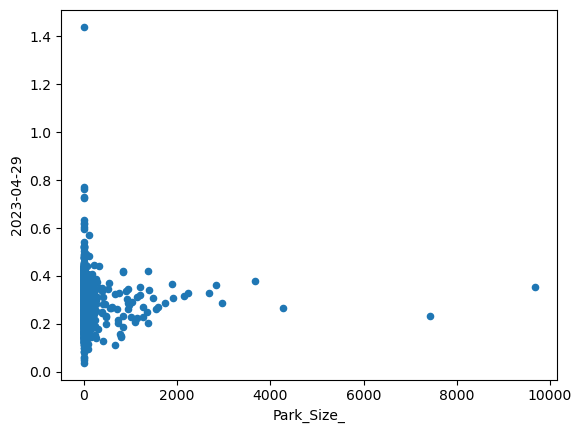

In [55]:
new_df3.plot.scatter(x = 'Park_Size_', y = '2023-04-29', s = 20)

In [56]:
perCap = pd.merge(cases_h, pop,  how='left', left_on=['countyFIPS','County Name','State'], right_on = ['countyFIPS','County Name','State'])
perCap

countyFIPS            County Name State  StateFIPS  2020-01-22  \
0              0  Statewide Unallocated    AL          1           0   
1           1001        Autauga County     AL          1           0   
2           1003        Baldwin County     AL          1           0   
3           1005        Barbour County     AL          1           0   
4           1007           Bibb County     AL          1           0   
...          ...                    ...   ...        ...         ...   
3188       56037     Sweetwater County     WY         56           0   
3189       56039          Teton County     WY         56           0   
3190       56041          Uinta County     WY         56           0   
3191       56043       Washakie County     WY         56           0   
3192       56045         Weston County     WY         56           0   

      2020-01-23  2020-01-24  2020-01-25  2020-01-26  2020-01-27  2020-01-28  \
0              0           0           0           0           0           0   
1              0           0           0           0           0           0   
2              0           0           0           0           0           0   
3              0           0           0           0           0           0   
4              0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
3188           0           0           0           0           0           0   
3189           0           0           0           0           0           0   
3190           0           0           0           0           0           0   
3191           0           0           0           0           0           0   
3192           0           0           0           0           0           0   

      2020-01-29  2020-01-30  2020-01-31  2020-02-01  2020-02-02  2020-02-03  \
0              0           0           0           0           0           0   
1              0           0           0           0           0           0   
2              0           0           0           0           0           0   
3              0           0           0           0           0           0   
4              0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
3188           0           0           0           0           0           0   
3189           0           0           0           0           0           0   
3190           0           0           0           0           0           0   
3191           0           0           0           0           0           0   
3192           0           0           0           0           0           0   

      2020-02-04  2020-02-05  2020-02-06  2020-02-07  2020-02-08  2020-02-09  \
0              0           0           0           0           0           0   
1              0           0           0           0           0           0   
2              0           0           0           0           0           0   
3              0           0           0           0           0           0   
4              0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
3188           0           0           0           0           0           0   
3189           0           0           0           0           0           0   
3190           0           0           0           0           0           0   
3191           0           0           0           0           0           0   
3192           0           0           0           0           0           0   

      2020-02-10  2020-02-11  2020-02-12  2020-02-13  2020-02-14  2020-02-15  \
0              0           0           0           0           0           0   
1              0           0           0           0           0           0   
2              0  

In [57]:
pop

countyFIPS            County Name State  population
0              0  Statewide Unallocated    AL           0
1           1001         Autauga County    AL       55869
2           1003         Baldwin County    AL      223234
3           1005         Barbour County    AL       24686
4           1007            Bibb County    AL       22394
...          ...                    ...   ...         ...
3190       56037      Sweetwater County    WY       42343
3191       56039           Teton County    WY       23464
3192       56041           Uinta County    WY       20226
3193       56043        Washakie County    WY        7805
3194       56045          Weston County    WY        6927

[3195 rows x 4 columns]

In [58]:
perCap1 = perCap[['countyFIPS', 'County Name', 'State','2023-04-29', 'population']]
perCap1

countyFIPS            County Name State  2023-04-29  population
0              0  Statewide Unallocated    AL           0         0.0
1           1001        Autauga County     AL       19893         NaN
2           1003        Baldwin County     AL       70420         NaN
3           1005        Barbour County     AL        7575         NaN
4           1007           Bibb County     AL        8136         NaN
...          ...                    ...   ...         ...         ...
3188       56037     Sweetwater County     WY       12544         NaN
3189       56039          Teton County     WY       12162         NaN
3190       56041          Uinta County     WY        6437         NaN
3191       56043       Washakie County     WY        2702         NaN
3192       56045         Weston County     WY        1909         NaN

[3193 rows x 5 columns]

In [59]:
# first phase (end 2020-06-30)
# cumulative
cases_1st = cases_h[['countyFIPS', 'County Name', 'State','2020-06-30']]
cases_1st

countyFIPS            County Name State  2020-06-30
0              0  Statewide Unallocated    AL           0
1           1001        Autauga County     AL         537
2           1003        Baldwin County     AL         680
3           1005        Barbour County     AL         325
4           1007           Bibb County     AL         170
...          ...                    ...   ...         ...
3188       56037     Sweetwater County     WY          89
3189       56039          Teton County     WY         129
3190       56041          Uinta County     WY         176
3191       56043       Washakie County     WY          39
3192       56045         Weston County     WY           2

[3193 rows x 4 columns]

In [60]:
# perCap for 1st phase
perCap_1st = pd.merge(cases_1st, pop,  how='left', left_on=['countyFIPS'], right_on = ['countyFIPS'])
#perCap_1st

notUse1 = perCap_1st[(perCap_1st['population'] == 0.0)].index
perCap_1st.drop(notUse1 , inplace=True)
#perCap_1st

perCap_1st['perCapita'] = perCap_1st['2020-06-30'].div(perCap_1st['population'])
#perCap_1st


In [61]:
perCap_1st = perCap_1st[['countyFIPS', 'County Name_x','2020-06-30', 'State_x','perCapita']]
perCap_1st

countyFIPS       County Name_x  2020-06-30 State_x  perCapita
51          1001     Autauga County          537      AL   0.009612
52          1003     Baldwin County          680      AL   0.003046
53          1005     Barbour County          325      AL   0.013165
54          1007        Bibb County          170      AL   0.007591
55          1009      Blount County          208      AL   0.003597
...          ...                 ...         ...     ...        ...
5738       56037  Sweetwater County           89      WY   0.002102
5739       56039       Teton County          129      WY   0.005498
5740       56041       Uinta County          176      WY   0.008702
5741       56043    Washakie County           39      WY   0.004997
5742       56045      Weston County            2      WY   0.000289

[3142 rows x 5 columns]

In [62]:
# dataframe for first phase with park size and cases 
firstPhase =  pd.merge(perCap_1st, new_df2,  how='left', left_on=['countyFIPS'], right_on = ['fips'])
#firstPhase
first = firstPhase[['countyFIPS', 'County Name_x','State_x','2020-06-30','perCapita','Park_Size_']]
first

countyFIPS       County Name_x State_x  2020-06-30  perCapita  \
0           1001     Autauga County       AL         537   0.009612   
1           1003     Baldwin County       AL         680   0.003046   
2           1005     Barbour County       AL         325   0.013165   
3           1007        Bibb County       AL         170   0.007591   
4           1009      Blount County       AL         208   0.003597   
...          ...                 ...     ...         ...        ...   
3137       56037  Sweetwater County       WY          89   0.002102   
3138       56039       Teton County       WY         129   0.005498   
3139       56041       Uinta County       WY         176   0.008702   
3140       56043    Washakie County       WY          39   0.004997   
3141       56045      Weston County       WY           2   0.000289   

      Park_Size_  
0       0.589645  
1       5.641093  
2       0.341511  
3       0.127630  
4       0.082185  
...          ...  
3137    0.138097  
3138    0.037505  
3139    0.167717  
3140    0.066117  
3141    0.015487  

[3142 rows x 6 columns]

In [63]:
#second phase (July 2020 - Nov 2020)
cases_2nd = cases_h[['countyFIPS', 'County Name', 'State','2020-06-30','2020-11-30']]
cases_2nd

countyFIPS            County Name State  2020-06-30  2020-11-30
0              0  Statewide Unallocated    AL           0           0
1           1001        Autauga County     AL         537        2780
2           1003        Baldwin County     AL         680        8890
3           1005        Barbour County     AL         325        1178
4           1007           Bibb County     AL         170        1196
...          ...                    ...   ...         ...         ...
3188       56037     Sweetwater County     WY          89        1888
3189       56039          Teton County     WY         129        1644
3190       56041          Uinta County     WY         176        1070
3191       56043       Washakie County     WY          39         441
3192       56045         Weston County     WY           2         397

[3193 rows x 5 columns]

In [64]:
cases_2nd['2nd phase'] = cases_2nd['2020-11-30'].subtract(cases_2nd['2020-06-30'])
cases_2nd

C:\Users\VU HONG ANH\AppData\Local\Temp\ipykernel_11900\3017844099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cases_2nd['2nd phase'] = cases_2nd['2020-11-30'].subtract(cases_2nd['2020-06-30'])


countyFIPS            County Name State  2020-06-30  2020-11-30  \
0              0  Statewide Unallocated    AL           0           0   
1           1001        Autauga County     AL         537        2780   
2           1003        Baldwin County     AL         680        8890   
3           1005        Barbour County     AL         325        1178   
4           1007           Bibb County     AL         170        1196   
...          ...                    ...   ...         ...         ...   
3188       56037     Sweetwater County     WY          89        1888   
3189       56039          Teton County     WY         129        1644   
3190       56041          Uinta County     WY         176        1070   
3191       56043       Washakie County     WY          39         441   
3192       56045         Weston County     WY           2         397   

      2nd phase  
0             0  
1          2243  
2          8210  
3           853  
4          1026  
...         ...  
3188       1799  
3189       1515  
3190        894  
3191        402  
3192        395  

[3193 rows x 6 columns]

In [65]:
cases_2nd_final = cases_2nd[['countyFIPS', 'County Name', 'State','2nd phase']]
cases_2nd_final

countyFIPS            County Name State  2nd phase
0              0  Statewide Unallocated    AL          0
1           1001        Autauga County     AL       2243
2           1003        Baldwin County     AL       8210
3           1005        Barbour County     AL        853
4           1007           Bibb County     AL       1026
...          ...                    ...   ...        ...
3188       56037     Sweetwater County     WY       1799
3189       56039          Teton County     WY       1515
3190       56041          Uinta County     WY        894
3191       56043       Washakie County     WY        402
3192       56045         Weston County     WY        395

[3193 rows x 4 columns]

In [66]:
# perCap for 2nd phase
perCap_2nd = pd.merge(cases_2nd_final, pop,  how='left', left_on=['countyFIPS'], right_on = ['countyFIPS'])
#perCap_2nd

notUse2 = perCap_2nd[(perCap_2nd['population'] == 0.0)].index
perCap_2nd.drop(notUse2 , inplace=True)
#perCap_2nd

perCap_2nd['perCapita'] = perCap_2nd['2nd phase'].div(perCap_2nd['population'])
perCap_2nd

countyFIPS       County Name_x State_x  2nd phase      County Name_y  \
51          1001     Autauga County       AL       2243     Autauga County   
52          1003     Baldwin County       AL       8210     Baldwin County   
53          1005     Barbour County       AL        853     Barbour County   
54          1007        Bibb County       AL       1026        Bibb County   
55          1009      Blount County       AL       2789      Blount County   
...          ...                 ...     ...        ...                ...   
5738       56037  Sweetwater County       WY       1799  Sweetwater County   
5739       56039       Teton County       WY       1515       Teton County   
5740       56041       Uinta County       WY        894       Uinta County   
5741       56043    Washakie County       WY        402    Washakie County   
5742       56045      Weston County       WY        395      Weston County   

     State_y  population  perCapita  
51        AL       55869   0.040147  
52        AL      223234   0.036778  
53        AL       24686   0.034554  
54        AL       22394   0.045816  
55        AL       57826   0.048231  
...      ...         ...        ...  
5738      WY       42343   0.042486  
5739      WY       23464   0.064567  
5740      WY       20226   0.044201  
5741      WY        7805   0.051505  
5742      WY        6927   0.057023  

[3142 rows x 8 columns]

In [67]:
# dataframe for second phase with park size and cases 
secondPhase =  pd.merge(perCap_2nd, new_df2,  how='left', left_on=['countyFIPS'], right_on = ['fips'])
#secondPhase

second = secondPhase[['countyFIPS', 'County Name_x','State_x','2nd phase','perCapita','Park_Size_']]
second

countyFIPS       County Name_x State_x  2nd phase  perCapita  Park_Size_
0           1001     Autauga County       AL       2243   0.040147    0.589645
1           1003     Baldwin County       AL       8210   0.036778    5.641093
2           1005     Barbour County       AL        853   0.034554    0.341511
3           1007        Bibb County       AL       1026   0.045816    0.127630
4           1009      Blount County       AL       2789   0.048231    0.082185
...          ...                 ...     ...        ...        ...         ...
3137       56037  Sweetwater County       WY       1799   0.042486    0.138097
3138       56039       Teton County       WY       1515   0.064567    0.037505
3139       56041       Uinta County       WY        894   0.044201    0.167717
3140       56043    Washakie County       WY        402   0.051505    0.066117
3141       56045      Weston County       WY        395   0.057023    0.015487

[3142 rows x 6 columns]

In [68]:
#third phase (Dec 2020 - March 2021)
cases_3rd = cases_h[['countyFIPS', 'County Name', 'State','2020-11-30', '2021-03-31']]
cases_3rd

countyFIPS            County Name State  2020-11-30  2021-03-31
0              0  Statewide Unallocated    AL           0           0
1           1001        Autauga County     AL        2780        6589
2           1003        Baldwin County     AL        8890       20505
3           1005        Barbour County     AL        1178        2227
4           1007           Bibb County     AL        1196        2542
...          ...                    ...   ...         ...         ...
3188       56037     Sweetwater County     WY        1888        4022
3189       56039          Teton County     WY        1644        3609
3190       56041          Uinta County     WY        1070        2128
3191       56043       Washakie County     WY         441         891
3192       56045         Weston County     WY         397         633

[3193 rows x 5 columns]

In [69]:
cases_3rd['3rd phase'] = cases_3rd['2021-03-31'].subtract(cases_3rd['2020-11-30'])
cases_3rd

C:\Users\VU HONG ANH\AppData\Local\Temp\ipykernel_11900\1234831334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cases_3rd['3rd phase'] = cases_3rd['2021-03-31'].subtract(cases_3rd['2020-11-30'])


countyFIPS            County Name State  2020-11-30  2021-03-31  \
0              0  Statewide Unallocated    AL           0           0   
1           1001        Autauga County     AL        2780        6589   
2           1003        Baldwin County     AL        8890       20505   
3           1005        Barbour County     AL        1178        2227   
4           1007           Bibb County     AL        1196        2542   
...          ...                    ...   ...         ...         ...   
3188       56037     Sweetwater County     WY        1888        4022   
3189       56039          Teton County     WY        1644        3609   
3190       56041          Uinta County     WY        1070        2128   
3191       56043       Washakie County     WY         441         891   
3192       56045         Weston County     WY         397         633   

      3rd phase  
0             0  
1          3809  
2         11615  
3          1049  
4          1346  
...         ...  
3188       2134  
3189       1965  
3190       1058  
3191        450  
3192        236  

[3193 rows x 6 columns]

In [70]:
cases_3rd_final = cases_3rd[['countyFIPS', 'County Name', 'State','3rd phase']]
cases_3rd_final

countyFIPS            County Name State  3rd phase
0              0  Statewide Unallocated    AL          0
1           1001        Autauga County     AL       3809
2           1003        Baldwin County     AL      11615
3           1005        Barbour County     AL       1049
4           1007           Bibb County     AL       1346
...          ...                    ...   ...        ...
3188       56037     Sweetwater County     WY       2134
3189       56039          Teton County     WY       1965
3190       56041          Uinta County     WY       1058
3191       56043       Washakie County     WY        450
3192       56045         Weston County     WY        236

[3193 rows x 4 columns]

In [71]:
# perCap for 3rd phase
perCap_3rd = pd.merge(cases_3rd_final, pop,  how='left', left_on=['countyFIPS'], right_on = ['countyFIPS'])
#perCap_3rd

notUse3 = perCap_3rd[(perCap_3rd['population'] == 0.0)].index
perCap_3rd.drop(notUse3 , inplace=True)
#perCap_3rd

perCap_3rd['perCapita'] = perCap_3rd['3rd phase'].div(perCap_3rd['population'])
perCap_3rd

countyFIPS       County Name_x State_x  3rd phase      County Name_y  \
51          1001     Autauga County       AL       3809     Autauga County   
52          1003     Baldwin County       AL      11615     Baldwin County   
53          1005     Barbour County       AL       1049     Barbour County   
54          1007        Bibb County       AL       1346        Bibb County   
55          1009      Blount County       AL       3447      Blount County   
...          ...                 ...     ...        ...                ...   
5738       56037  Sweetwater County       WY       2134  Sweetwater County   
5739       56039       Teton County       WY       1965       Teton County   
5740       56041       Uinta County       WY       1058       Uinta County   
5741       56043    Washakie County       WY        450    Washakie County   
5742       56045      Weston County       WY        236      Weston County   

     State_y  population  perCapita  
51        AL       55869   0.068177  
52        AL      223234   0.052031  
53        AL       24686   0.042494  
54        AL       22394   0.060105  
55        AL       57826   0.059610  
...      ...         ...        ...  
5738      WY       42343   0.050398  
5739      WY       23464   0.083745  
5740      WY       20226   0.052309  
5741      WY        7805   0.057655  
5742      WY        6927   0.034070  

[3142 rows x 8 columns]

In [72]:
# dataframe for third phase with park size and cases 
thirdPhase =  pd.merge(perCap_3rd, new_df2,  how='left', left_on=['countyFIPS'], right_on = ['fips'])
thirdPhase

third = thirdPhase[['countyFIPS', 'County Name_x','State_x','3rd phase','perCapita','Park_Size_']]
third

countyFIPS       County Name_x State_x  3rd phase  perCapita  Park_Size_
0           1001     Autauga County       AL       3809   0.068177    0.589645
1           1003     Baldwin County       AL      11615   0.052031    5.641093
2           1005     Barbour County       AL       1049   0.042494    0.341511
3           1007        Bibb County       AL       1346   0.060105    0.127630
4           1009      Blount County       AL       3447   0.059610    0.082185
...          ...                 ...     ...        ...        ...         ...
3137       56037  Sweetwater County       WY       2134   0.050398    0.138097
3138       56039       Teton County       WY       1965   0.083745    0.037505
3139       56041       Uinta County       WY       1058   0.052309    0.167717
3140       56043    Washakie County       WY        450   0.057655    0.066117
3141       56045      Weston County       WY        236   0.034070    0.015487

[3142 rows x 6 columns]

In [73]:
#check the rural counties
ButteCounty = new_df2.loc[new_df2['name']=='San Francisco County']
ButteCounty

fips       state                  name  area_2010 Park_Cou_1  Park_State  \
223  6075  California  San Francisco County      46.87      06075  California   

               Park_Count  Park_Size_  
223  San Francisco County  194.499443

In [74]:
# urban counties-first phase
urban1 = first.loc[first['countyFIPS'].isin([36059, 48201, 6037, 42101,25025,17031,12011, 48113, 13121, 6075])]
urban_first = urban1.sort_values(by=['Park_Size_'], ascending=True)
#urban_first

urban1_percap = urban1.sort_values(by=['perCapita'], ascending=True)
#urban1_percap

urban1_total = urban1.sort_values(by=['2020-06-30'], ascending=True)
urban1_total

#outliers(5) = 194.499443(City and County of San Francisco), 48.387117(Fulton County), 167.032410(Suffolk County), 
#             64.347739(Dallas County), 129.537572(Philadelphia County)

countyFIPS                     County Name_x State_x  2020-06-30  \
223         6075  City and County of San Francisco      CA        4040   
446        13121                    Fulton County       GA        7146   
325        12011                   Broward County       FL       15624   
1229       25025                   Suffolk County       MA       19819   
2579       48113                    Dallas County       TX       20737   
2294       42101              Philadelphia County       PA       21600   
2623       48201                    Harris County       TX       30729   
1857       36059                    Nassau County       NY       41780   
610        17031                      Cook County       IL       90536   
204         6037               Los Angeles County       CA      118223   

      perCapita  Park_Size_  
223    0.004583  194.499443  
446    0.006717   48.387117  
325    0.008001   14.938782  
1229   0.024653  167.032410  
2579   0.007868   64.347739  
2294   0.013636  129.537572  
2623   0.006520   56.508657  
1857   0.030790   94.515056  
610    0.017579  144.355047  
204    0.011776  320.048065

In [75]:
# rural counties-first phase
rural1 = first.loc[first['countyFIPS'].isin([45075, 42001, 39089, 30017,39141, 51179, 13139, 41003, 17037, 40031])]
rural_first = rural1.sort_values(by=['Park_Size_'], ascending=True)
#rural_first

rural1_percap = rural1.sort_values(by=['perCapita'], ascending=True)
#rural1_percap

rural1_total = rural1.sort_values(by=['2020-06-30'], ascending=True)
rural1_total

#outliers(4) = 4.097843(Benton County), 1.302520(Ross County), 2.648698(Licking County), 0.294430(Stafford County)

countyFIPS       County Name_x State_x  2020-06-30  perCapita  \
1606       30017      Custer County       MT          27   0.002368   
2209       41003      Benton County       OR          82   0.000881   
2113       39141        Ross County       OH         107   0.001396   
2244       42001       Adams County       PA         339   0.003291   
2087       39089     Licking County       OH         404   0.002284   
2146       40031    Comanche County       OK         406   0.003362   
613        17037      DeKalb County       IL         550   0.005243   
2353       45075  Orangeburg County       SC         747   0.008668   
2905       51179    Stafford County       VA         988   0.006463   
455        13139        Hall County       GA        3227   0.015785   

      Park_Size_  
1606    0.191149  
2209    4.097843  
2113    1.302520  
2244    0.654625  
2087    2.648698  
2146    1.004929  
613     2.196863  
2353    0.294430  
2905    8.469353  
455    23.406991

In [76]:
# urban counties- second phase
urban2 = second.loc[second['countyFIPS'].isin([36059, 48201, 6037, 42101,25025,17031,12011, 48113, 13121, 6075])]
urban_second = urban2.sort_values(by=['Park_Size_'], ascending=True)
#urban_second

urban2_percap = urban2.sort_values(by=['perCapita'], ascending=True)
#urban2_percap

urban2_total = urban2.sort_values(by=['2nd phase'], ascending=True)
urban2_total

#outliers(6) = 194.499443(City and County of San Francisco), 167.032410(Suffolk County), 94.515056(Nassau County), 
#             129.537572(Philadelphia County), 14.938782(Broward County), 64.347739(Broward County)

countyFIPS                     County Name_x State_x  2nd phase  \
223         6075  City and County of San Francisco      CA      12330   
1229       25025                   Suffolk County       MA      18228   
1857       36059                    Nassau County       NY      18921   
446        13121                    Fulton County       GA      30323   
2294       42101              Philadelphia County       PA      40187   
325        12011                   Broward County       FL      91900   
2579       48113                    Dallas County       TX     117359   
2623       48201                    Harris County       TX     159902   
610        17031                      Cook County       IL     215833   
204         6037               Los Angeles County       CA     302997   

      perCapita  Park_Size_  
223    0.013987  194.499443  
1229   0.022674  167.032410  
1857   0.013944   94.515056  
446    0.028501   48.387117  
2294   0.025370  129.537572  
325    0.047061   14.938782  
2579   0.044530   64.347739  
2623   0.033926   56.508657  
610    0.041907  144.355047  
204    0.030182  320.048065

In [77]:
# rural counties- second phase
rural2 = second.loc[second['countyFIPS'].isin([45075, 42001, 39089, 30017,39141, 51179, 13139, 41003, 17037, 40031])]
rural_second = rural2.sort_values(by=['Park_Size_'], ascending=True)
#rural_second

rural2_percap = rural2.sort_values(by=['perCapita'], ascending=True)
#rural2_percap

rural2_total = rural2.sort_values(by=['2nd phase'], ascending=True)
rural2_total

#outliers(4) =  4.097843(Benton County), 8.469353(Stafford County), 0.294430(Orangeburg County), 1.004929(Comanche County)

countyFIPS       County Name_x State_x  2nd phase  perCapita  Park_Size_
1606       30017      Custer County       MT        708   0.062094    0.191149
2209       41003      Benton County       OR        718   0.007716    4.097843
2244       42001       Adams County       PA       1689   0.016397    0.654625
2905       51179    Stafford County       VA       2318   0.015162    8.469353
2113       39141        Ross County       OH       2513   0.032779    1.302520
2353       45075  Orangeburg County       SC       3075   0.035683    0.294430
2146       40031    Comanche County       OK       4471   0.037027    1.004929
613        17037      DeKalb County       IL       4478   0.042689    2.196863
2087       39089     Licking County       OH       5791   0.032743    2.648698
455        13139        Hall County       GA       9198   0.044991   23.406991

In [78]:
# urban counties- third phase
urban3 = third.loc[third['countyFIPS'].isin([36059, 48201, 6037, 42101,25025,17031,12011, 48113, 13121, 6075])]
urban_third = urban3.sort_values(by=['Park_Size_'], ascending=True)
#urban_third

urban3_percap = urban3.sort_values(by=['perCapita'], ascending=True)
urban3_percap

#urban3_total = urban3.sort_values(by=['3rd phase'], ascending=True)
#urban3_total

#outliers(6) = 194.499443(City and County of San Francisco), 167.032410(Suffolk County), 94.515056(Nassau County), 
#             129.537572(Philadelphia County), 14.938782(Broward County), 64.347739(Broward County) 
# => outliers similar to urban_phase 2

countyFIPS                     County Name_x State_x  3rd phase  \
223         6075  City and County of San Francisco      CA      18910   
610        17031                      Cook County       IL     191516   
446        13121                    Fulton County       GA      40953   
2623       48201                    Harris County       TX     185523   
2294       42101              Philadelphia County       PA      63060   
325        12011                   Broward County       FL     107075   
1229       25025                   Suffolk County       MA      46599   
2579       48113                    Dallas County       TX     152802   
204         6037               Los Angeles County       CA     763741   
1857       36059                    Nassau County       NY     106856   

      perCapita  Park_Size_  
223    0.021451  194.499443  
610    0.037186  144.355047  
446    0.038492   48.387117  
2623   0.039361   56.508657  
2294   0.039809  129.537572  
325    0.054832   14.938782  
1229   0.057966  167.032410  
2579   0.057978   64.347739  
204    0.076077  320.048065  
1857   0.078749   94.515056

In [79]:
# rural counties- third phase
rural3 = third.loc[second['countyFIPS'].isin([45075, 42001, 39089, 30017,39141, 51179, 13139, 41003, 17037, 40031])]
rural_third = rural3.sort_values(by=['Park_Size_'], ascending=True)
#rural_third

rural3_percap = rural3.sort_values(by=['perCapita'], ascending=True)
#rural2_percap

rural3_total = rural3.sort_values(by=['3rd phase'], ascending=True)
rural3_total

#outliers(4) = 4.097843(Benton County), 2.196863(DeKalb County), 1.302520(Ross County), 8.469353(Stafford County)

countyFIPS       County Name_x State_x  3rd phase  perCapita  Park_Size_
1606       30017      Custer County       MT        435   0.038151    0.191149
2209       41003      Benton County       OR       1782   0.019150    4.097843
613        17037      DeKalb County       IL       3623   0.034539    2.196863
2113       39141        Ross County       OH       3857   0.050309    1.302520
2353       45075  Orangeburg County       SC       5493   0.063742    0.294430
2244       42001       Adams County       PA       6084   0.059063    0.654625
2905       51179    Stafford County       VA       6844   0.044767    8.469353
2146       40031    Comanche County       OK       8182   0.067760    1.004929
2087       39089     Licking County       OH       9503   0.053731    2.648698
455        13139        Hall County       GA      12000   0.058697   23.406991

In [80]:
#pop
pop_sort = pop.sort_values(by=['population'], ascending=True)
pop_sort

countyFIPS            County Name State  population
0              0  Statewide Unallocated    AL           0
2823           0  Statewide Unallocated    UT           0
325            0  Statewide Unallocated    DE           0
316            0  Statewide Unallocated    CT           0
1776           0  Statewide Unallocated    NV           0
...          ...                    ...   ...         ...
229         6073       San Diego County    CA     3338330
107         4013        Maricopa County    AZ     4485414
2669       48201          Harris County    TX     4713325
625        17031            Cook County    IL     5150233
211         6037     Los Angeles County    CA    10039107

[3195 rows x 4 columns]

In [81]:
# first phase datapframe with population
perCap1_pop = pd.merge(first, pop,  how='left', left_on=['countyFIPS'], right_on = ['countyFIPS'])
perCap1_pop = perCap1_pop[['countyFIPS', 'County Name','State', '2020-06-30','perCapita', 'population','Park_Size_']]
perCap1_pop

countyFIPS        County Name State  2020-06-30  perCapita  population  \
0           1001     Autauga County    AL         537   0.009612       55869   
1           1003     Baldwin County    AL         680   0.003046      223234   
2           1005     Barbour County    AL         325   0.013165       24686   
3           1007        Bibb County    AL         170   0.007591       22394   
4           1009      Blount County    AL         208   0.003597       57826   
...          ...                ...   ...         ...        ...         ...   
3137       56037  Sweetwater County    WY          89   0.002102       42343   
3138       56039       Teton County    WY         129   0.005498       23464   
3139       56041       Uinta County    WY         176   0.008702       20226   
3140       56043    Washakie County    WY          39   0.004997        7805   
3141       56045      Weston County    WY           2   0.000289        6927   

      Park_Size_  
0       0.589645  
1       5.641093  
2       0.341511  
3       0.127630  
4       0.082185  
...          ...  
3137    0.138097  
3138    0.037505  
3139    0.167717  
3140    0.066117  
3141    0.015487  

[3142 rows x 7 columns]

###### 

In [82]:
# sort based on population
perCap1_pop = perCap1_pop.sort_values(by=['population'], ascending=True)
#perCap1_pop

#drop 0.0 values
notUse1_pop = perCap1_pop[(perCap1_pop['Park_Size_'] == 0.0)].index
perCap1_pop.drop(notUse1_pop , inplace=True)
perCap1_pop


countyFIPS         County Name State  2020-06-30  perCapita  population  \
504        13239      Quitman County    GA          17   0.007395        2299   
416        13061         Clay County    GA          56   0.019760        2834   
2419       46117      Stanley County    SD          12   0.003873        3098   
2575       48105     Crockett County    TX           9   0.002598        3464   
2658       48271       Kinney County    TX           2   0.000545        3667   
...          ...                 ...   ...         ...        ...         ...   
222         6073    San Diego County    CA       17390   0.005209     3338330   
103         4013     Maricopa County    AZ       48592   0.010833     4485414   
2623       48201       Harris County    TX       30729   0.006520     4713325   
610        17031         Cook County    IL       90536   0.017579     5150233   
204         6037  Los Angeles County    CA      118223   0.011776    10039107   

      Park_Size_  
504     5.958252  
416     7.823563  
2419    0.006787  
2575    0.022706  
2658    0.038803  
...          ...  
222   210.200332  
103   512.279994  
2623   56.508657  
610   144.355047  
204   320.048065  

[2405 rows x 7 columns]

In [83]:
perCap1_head = perCap1_pop.head(200)
perCap1_tail = perCap1_pop.tail(200)
#perCap1_tail

<Axes: xlabel='Park_Size_', ylabel='perCapita'>

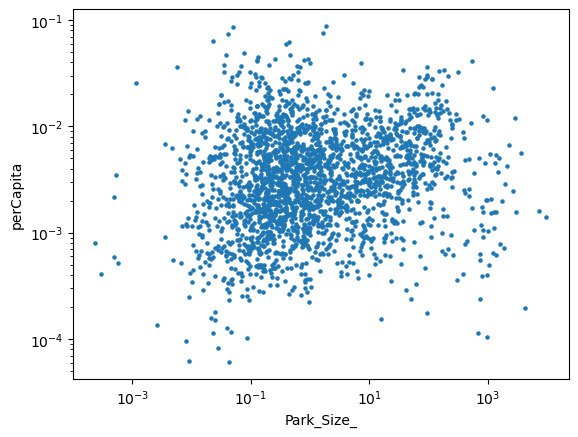

In [84]:
# 1st phase - scatter plot log scale of all counties (per capita)
perCap1_pop.plot.scatter(x = 'Park_Size_', y = 'perCapita', s = 5, loglog = True)

<Axes: xlabel='Park_Size_', ylabel='2020-06-30'>

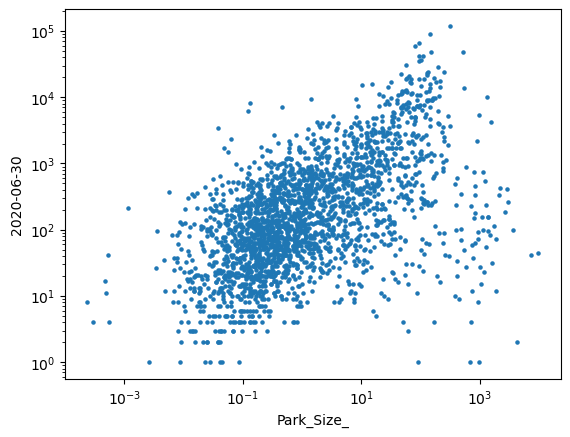

In [106]:
# 1st phase - scatter plot log scale of all counties (cumulative)
perCap1_pop.plot.scatter(x = 'Park_Size_', y = '2020-06-30', s = 5, loglog = True)

<Axes: xlabel='Park_Size_', ylabel='2020-06-30'>

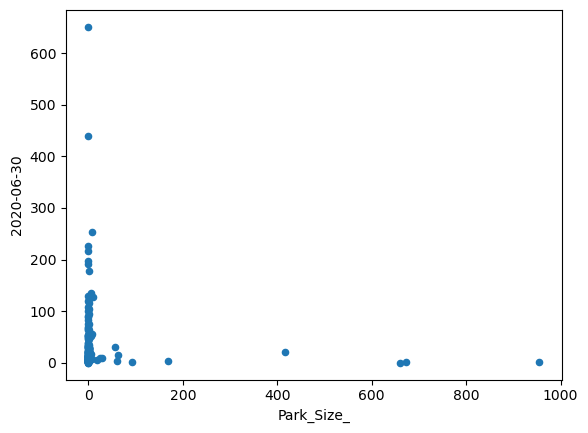

In [85]:
# 1st phase - scatter plot for the 200 least populated counties (no log)
perCap1_head.plot.scatter(x = 'Park_Size_', y = '2020-06-30', s = 20)

<Axes: xlabel='Park_Size_', ylabel='2020-06-30'>

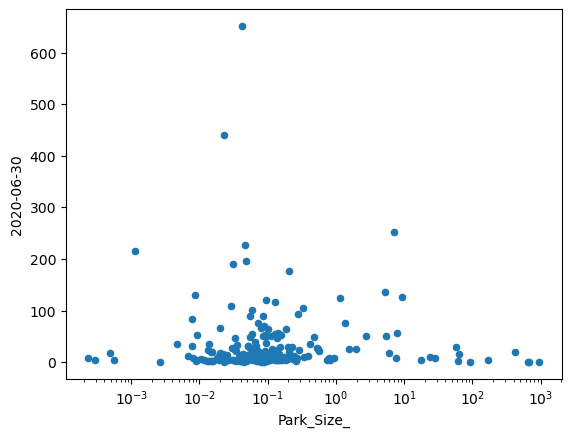

In [86]:
# 1st phase - scatter plot for the 200 least populated counties (log)
perCap1_head.plot.scatter(x = 'Park_Size_', y = '2020-06-30', s = 20, logx=True)

<Axes: xlabel='Park_Size_', ylabel='2020-06-30'>

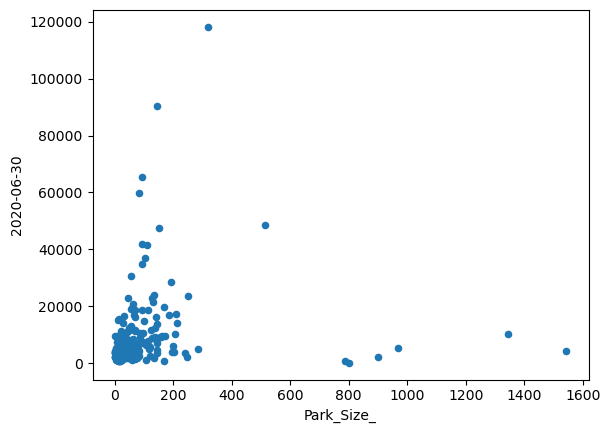

In [87]:
# 1st phase - scatter plot for the most populated 200 counties  (no log)
perCap1_tail.plot.scatter(x = 'Park_Size_', y = '2020-06-30', s = 20)

<Axes: xlabel='Park_Size_', ylabel='2020-06-30'>

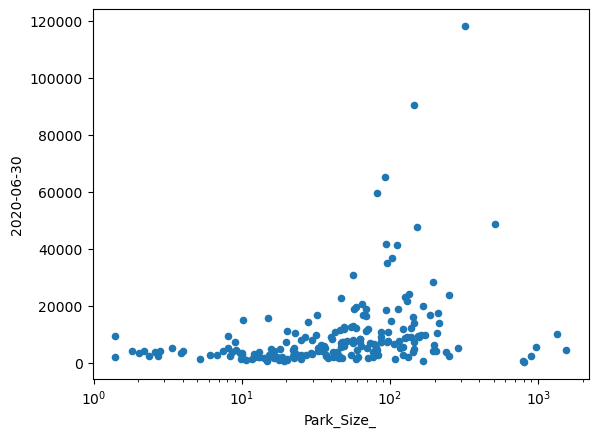

In [88]:
# 1st phase - scatter plot for the most populated 200 counties (log)
perCap1_tail.plot.scatter(x = 'Park_Size_', y = '2020-06-30', s = 20, logx=True)

In [89]:
# second phase datapframe with population
perCap2_pop = pd.merge(second, pop,  how='left', left_on=['countyFIPS'], right_on = ['countyFIPS'])
perCap2_pop = perCap2_pop[['countyFIPS', 'County Name','State', '2nd phase','perCapita', 'population','Park_Size_']]
perCap2_pop

countyFIPS        County Name State  2nd phase  perCapita  population  \
0           1001     Autauga County    AL       2243   0.040147       55869   
1           1003     Baldwin County    AL       8210   0.036778      223234   
2           1005     Barbour County    AL        853   0.034554       24686   
3           1007        Bibb County    AL       1026   0.045816       22394   
4           1009      Blount County    AL       2789   0.048231       57826   
...          ...                ...   ...        ...        ...         ...   
3137       56037  Sweetwater County    WY       1799   0.042486       42343   
3138       56039       Teton County    WY       1515   0.064567       23464   
3139       56041       Uinta County    WY        894   0.044201       20226   
3140       56043    Washakie County    WY        402   0.051505        7805   
3141       56045      Weston County    WY        395   0.057023        6927   

      Park_Size_  
0       0.589645  
1       5.641093  
2       0.341511  
3       0.127630  
4       0.082185  
...          ...  
3137    0.138097  
3138    0.037505  
3139    0.167717  
3140    0.066117  
3141    0.015487  

[3142 rows x 7 columns]

In [90]:
# sort based on population
perCap2_pop = perCap2_pop.sort_values(by=['population'], ascending=True)
#perCap2_pop

#drop 0.0 values
notUse2_pop = perCap2_pop[(perCap2_pop['Park_Size_'] == 0.0)].index
perCap2_pop.drop(notUse2_pop , inplace=True)
perCap2_pop


countyFIPS         County Name State  2nd phase  perCapita  population  \
504        13239      Quitman County    GA         27   0.011744        2299   
416        13061         Clay County    GA         70   0.024700        2834   
2419       46117      Stanley County    SD        217   0.070045        3098   
2575       48105     Crockett County    TX        428   0.123557        3464   
2658       48271       Kinney County    TX         87   0.023725        3667   
...          ...                 ...   ...        ...        ...         ...   
222         6073    San Diego County    CA      70586   0.021144     3338330   
103         4013     Maricopa County    AZ     157066   0.035017     4485414   
2623       48201       Harris County    TX     159902   0.033926     4713325   
610        17031         Cook County    IL     215833   0.041907     5150233   
204         6037  Los Angeles County    CA     302997   0.030182    10039107   

      Park_Size_  
504     5.958252  
416     7.823563  
2419    0.006787  
2575    0.022706  
2658    0.038803  
...          ...  
222   210.200332  
103   512.279994  
2623   56.508657  
610   144.355047  
204   320.048065  

[2405 rows x 7 columns]

In [91]:
perCap2_head = perCap2_pop.head(200)
perCap2_tail = perCap2_pop.tail(200)
perCap2_tail

countyFIPS         County Name State  2nd phase  perCapita  population  \
1315       27003        Anoka County    MN      20486   0.057396      356921   
2700       48355       Nueces County    TX      22146   0.061127      362294   
2536       48027         Bell County    TX       7256   0.019993      362924   
360        12083       Marion County    FL      12372   0.033842      365579   
353        12069         Lake County    FL       9369   0.025520      367118   
...          ...                 ...   ...        ...        ...         ...   
222         6073    San Diego County    CA      70586   0.021144     3338330   
103         4013     Maricopa County    AZ     157066   0.035017     4485414   
2623       48201       Harris County    TX     159902   0.033926     4713325   
610        17031         Cook County    IL     215833   0.041907     5150233   
204         6037  Los Angeles County    CA     302997   0.030182    10039107   

      Park_Size_  
1315   60.635583  
2700   13.113700  
2536   25.192085  
360    14.865901  
353     5.180359  
...          ...  
222   210.200332  
103   512.279994  
2623   56.508657  
610   144.355047  
204   320.048065  

[200 rows x 7 columns]

<Axes: xlabel='Park_Size_', ylabel='perCapita'>

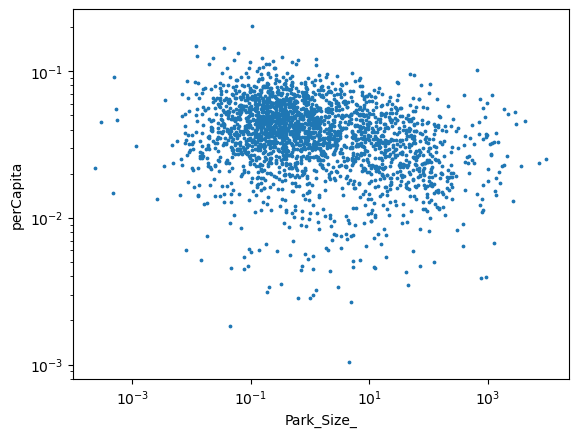

In [92]:
# 2nd phase - scatter plot log scale of all counties(per Capita)
perCap2_pop.plot.scatter(x = 'Park_Size_', y = 'perCapita', s = 3, loglog = True)

<Axes: xlabel='Park_Size_', ylabel='2nd phase'>

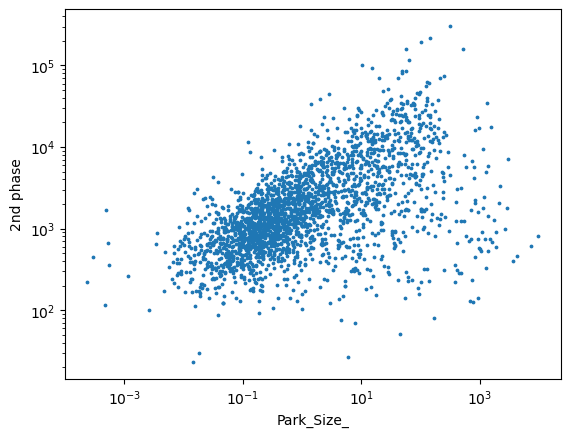

In [107]:
# 2nd phase - scatter plot log scale of all counties(cumulative)
perCap2_pop.plot.scatter(x = 'Park_Size_', y = '2nd phase', s = 3, loglog = True)

<Axes: xlabel='Park_Size_', ylabel='2nd phase'>

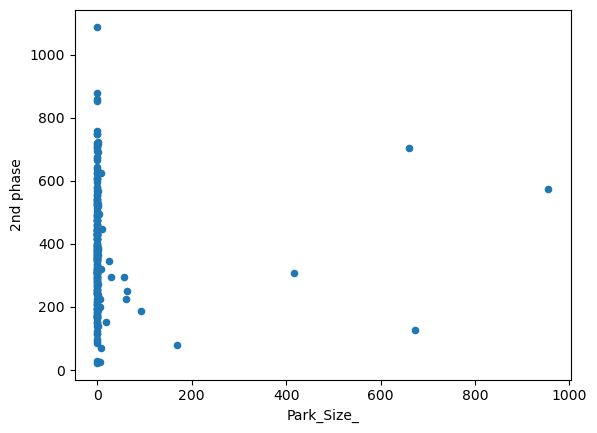

In [93]:
# 2nd phase - scatter plot for the 200 least populated counties(no log)
perCap2_head.plot.scatter(x = 'Park_Size_', y = '2nd phase', s = 20)

<Axes: xlabel='Park_Size_', ylabel='2nd phase'>

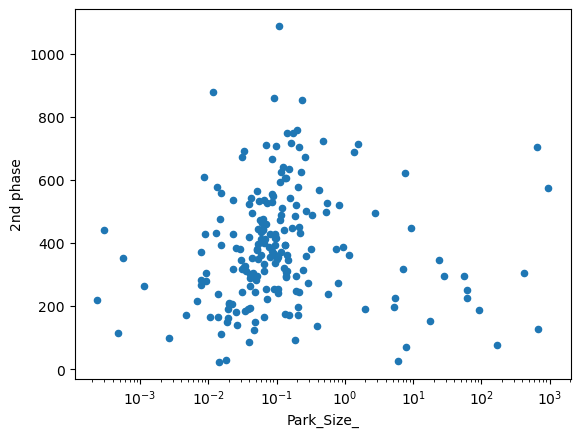

In [94]:
# 2nd phase - scatter plot for the 200 least populated counties (log)
perCap2_head.plot.scatter(x = 'Park_Size_', y = '2nd phase', s = 20, logx = True)

<Axes: xlabel='Park_Size_', ylabel='2nd phase'>

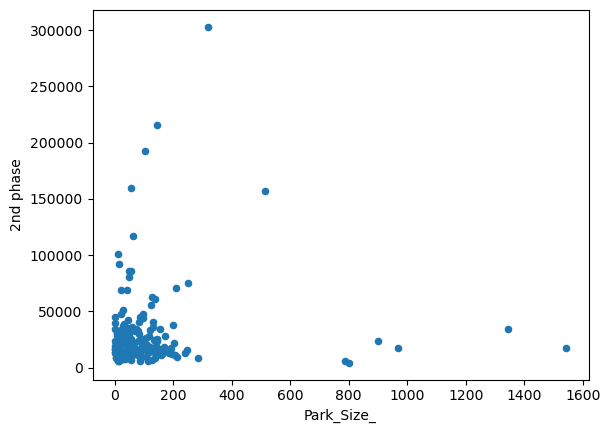

In [95]:
# 2nd phase - scatter plot for the 200 most populated counties (no log)
perCap2_tail.plot.scatter(x = 'Park_Size_', y = '2nd phase', s = 20)

<Axes: xlabel='Park_Size_', ylabel='2nd phase'>

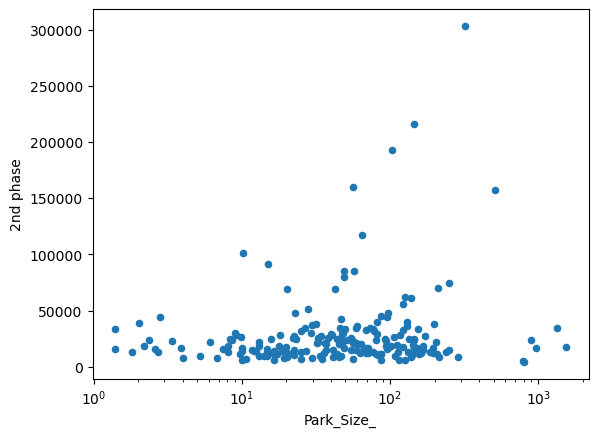

In [96]:
# 2nd phase - scatter plot for the 200 most populated counties (log)
perCap2_tail.plot.scatter(x = 'Park_Size_', y = '2nd phase', s = 20, logx = True)

In [97]:
# third phase datapframe with population
perCap3_pop = pd.merge(third, pop,  how='left', left_on=['countyFIPS'], right_on = ['countyFIPS'])
perCap3_pop = perCap3_pop[['countyFIPS', 'County Name','State', '3rd phase','perCapita', 'population','Park_Size_']]
perCap3_pop

countyFIPS        County Name State  3rd phase  perCapita  population  \
0           1001     Autauga County    AL       3809   0.068177       55869   
1           1003     Baldwin County    AL      11615   0.052031      223234   
2           1005     Barbour County    AL       1049   0.042494       24686   
3           1007        Bibb County    AL       1346   0.060105       22394   
4           1009      Blount County    AL       3447   0.059610       57826   
...          ...                ...   ...        ...        ...         ...   
3137       56037  Sweetwater County    WY       2134   0.050398       42343   
3138       56039       Teton County    WY       1965   0.083745       23464   
3139       56041       Uinta County    WY       1058   0.052309       20226   
3140       56043    Washakie County    WY        450   0.057655        7805   
3141       56045      Weston County    WY        236   0.034070        6927   

      Park_Size_  
0       0.589645  
1       5.641093  
2       0.341511  
3       0.127630  
4       0.082185  
...          ...  
3137    0.138097  
3138    0.037505  
3139    0.167717  
3140    0.066117  
3141    0.015487  

[3142 rows x 7 columns]

In [98]:
# sort based on population
perCap3_pop = perCap3_pop.sort_values(by=['population'], ascending=True)
#perCap3_pop

#drop 0.0 values
notUse3_pop = perCap3_pop[(perCap3_pop['Park_Size_'] == 0.0)].index
perCap3_pop.drop(notUse3_pop , inplace=True)
perCap3_pop

countyFIPS         County Name State  3rd phase  perCapita  population  \
504        13239      Quitman County    GA         37   0.016094        2299   
416        13061         Clay County    GA         56   0.019760        2834   
2419       46117      Stanley County    SD        110   0.035507        3098   
2575       48105     Crockett County    TX        137   0.039550        3464   
2658       48271       Kinney County    TX        251   0.068448        3667   
...          ...                 ...   ...        ...        ...         ...   
222         6073    San Diego County    CA     182955   0.054804     3338330   
103         4013     Maricopa County    AZ     318728   0.071059     4485414   
2623       48201       Harris County    TX     185523   0.039361     4713325   
610        17031         Cook County    IL     191516   0.037186     5150233   
204         6037  Los Angeles County    CA     763741   0.076077    10039107   

      Park_Size_  
504     5.958252  
416     7.823563  
2419    0.006787  
2575    0.022706  
2658    0.038803  
...          ...  
222   210.200332  
103   512.279994  
2623   56.508657  
610   144.355047  
204   320.048065  

[2405 rows x 7 columns]

In [99]:
perCap3_head = perCap3_pop.head(200)
perCap3_tail = perCap3_pop.tail(200)
perCap3_head

countyFIPS       County Name State  3rd phase  perCapita  population  \
504        13239    Quitman County    GA         37   0.016094        2299   
416        13061       Clay County    GA         56   0.019760        2834   
2419       46117    Stanley County    SD        110   0.035507        3098   
2575       48105   Crockett County    TX        137   0.039550        3464   
2658       48271     Kinney County    TX        251   0.068448        3667   
...          ...               ...   ...        ...        ...         ...   
1527       29089     Howard County    MO        283   0.028297       10001   
84          2180  Nome Census Area    AK        108   0.010796       10004   
2784       49015      Emery County    UT        608   0.060727       10012   
307         8125       Yuma County    CO        507   0.050604       10019   
1698       31089       Holt County    NE        273   0.027118       10067   

      Park_Size_  
504     5.958252  
416     7.823563  
2419    0.006787  
2575    0.022706  
2658    0.038803  
...          ...  
1527    0.142052  
84      0.000236  
2784   28.323415  
307     0.009131  
1698    0.039996  

[200 rows x 7 columns]

<Axes: xlabel='Park_Size_', ylabel='perCapita'>

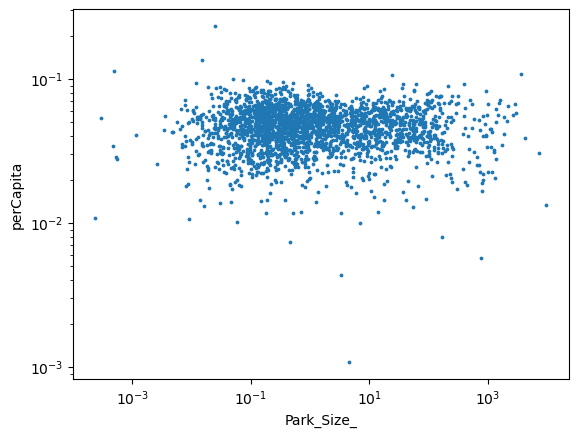

In [100]:
# 3rd phase - scatter plot log scale of all counties (per capita)
perCap3_pop.plot.scatter(x = 'Park_Size_', y = 'perCapita', s = 3, loglog = True)

<Axes: xlabel='Park_Size_', ylabel='3rd phase'>

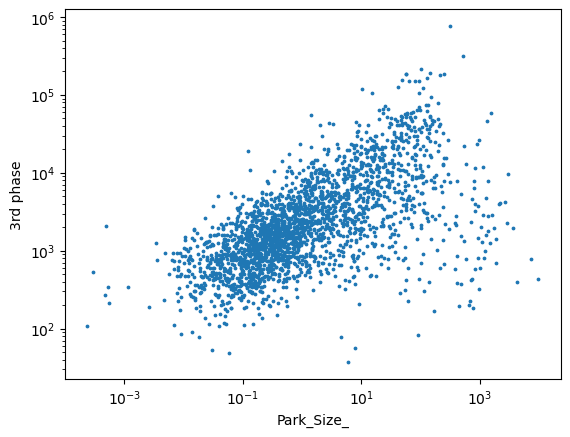

In [108]:
# 3rd phase - scatter plot log scale of all counties (per capita)
perCap3_pop.plot.scatter(x = 'Park_Size_', y = '3rd phase', s = 3, loglog = True)

<Axes: xlabel='Park_Size_', ylabel='3rd phase'>

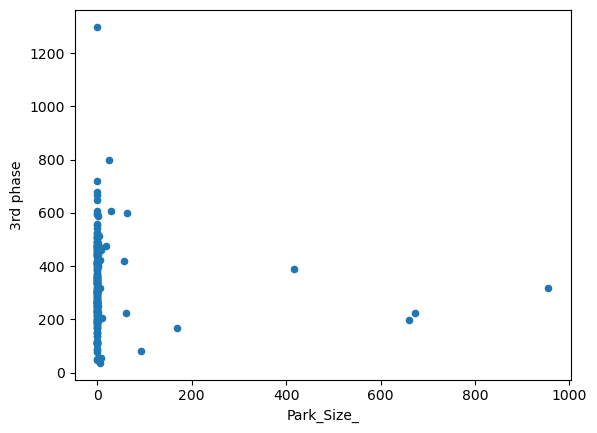

In [101]:
# 3rd phase - scatter plot for the least 200 populated counties (no log)
perCap3_head.plot.scatter(x = 'Park_Size_', y = '3rd phase', s = 20)

<Axes: xlabel='Park_Size_', ylabel='3rd phase'>

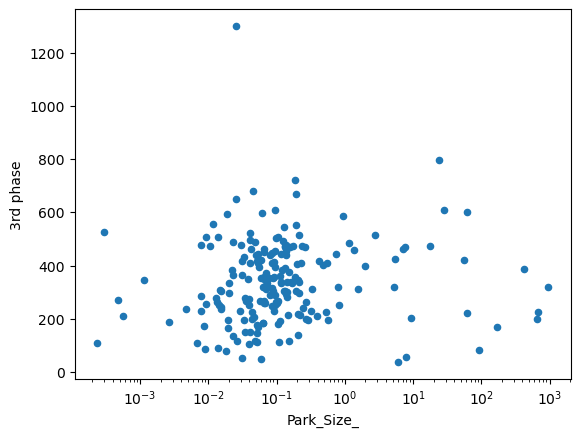

In [102]:
# 3rd phase - scatter plot for the least 200 populated counties (log)
perCap3_head.plot.scatter(x = 'Park_Size_', y = '3rd phase', s = 20, logx = True)

<Axes: xlabel='Park_Size_', ylabel='3rd phase'>

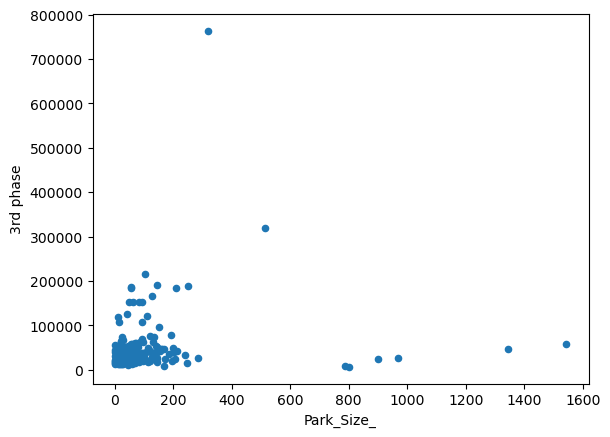

In [103]:
# 3rd phase - scatter plot for the 200 most populated counties (no log)
perCap3_tail.plot.scatter(x = 'Park_Size_', y = '3rd phase', s = 20)

<Axes: xlabel='Park_Size_', ylabel='3rd phase'>

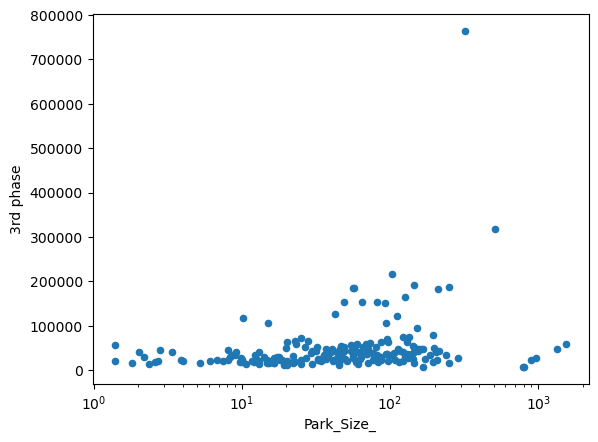

In [104]:
# 3rd phase - scatter plot for the 200 most populated counties (log)
perCap3_tail.plot.scatter(x = 'Park_Size_', y = '3rd phase', s = 20, logx = True)

In [105]:
deaths_h

countyFIPS            County Name State  StateFIPS  2020-01-22  \
0              0  Statewide Unallocated    AL          1           0   
1           1001        Autauga County     AL          1           0   
2           1003        Baldwin County     AL          1           0   
3           1005        Barbour County     AL          1           0   
4           1007           Bibb County     AL          1           0   
...          ...                    ...   ...        ...         ...   
3188       56037     Sweetwater County     WY         56           0   
3189       56039          Teton County     WY         56           0   
3190       56041          Uinta County     WY         56           0   
3191       56043       Washakie County     WY         56           0   
3192       56045         Weston County     WY         56           0   

      2020-01-23  2020-01-24  2020-01-25  2020-01-26  2020-01-27  2020-01-28  \
0              0           0           0           0           0           0   
1              0           0           0           0           0           0   
2              0           0           0           0           0           0   
3              0           0           0           0           0           0   
4              0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
3188           0           0           0           0           0           0   
3189           0           0           0           0           0           0   
3190           0           0           0           0           0           0   
3191           0           0           0           0           0           0   
3192           0           0           0           0           0           0   

      2020-01-29  2020-01-30  2020-01-31  2020-02-01  2020-02-02  2020-02-03  \
0              0           0           0           0           0           0   
1              0           0           0           0           0           0   
2              0           0           0           0           0           0   
3              0           0           0           0           0           0   
4              0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
3188           0           0           0           0           0           0   
3189           0           0           0           0           0           0   
3190           0           0           0           0           0           0   
3191           0           0           0           0           0           0   
3192           0           0           0           0           0           0   

      2020-02-04  2020-02-05  2020-02-06  2020-02-07  2020-02-08  2020-02-09  \
0              0           0           0           0           0           0   
1              0           0           0           0           0           0   
2              0           0           0           0           0           0   
3              0           0           0           0           0           0   
4              0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
3188           0           0           0           0           0           0   
3189           0           0           0           0           0           0   
3190           0           0           0           0           0           0   
3191           0           0           0           0           0           0   
3192           0           0           0           0           0           0   

      2020-02-10  2020-02-11  2020-02-12  2020-02-13  2020-02-14  2020-02-15  \
0              0           0           0           0           0           0   
1              0           0           0           0           0           0   
2              0  

In [110]:
# dataframe for total death cases
deaths_total = deaths_h[['countyFIPS', 'County Name','State', '2023-04-29']]
deaths_total

countyFIPS            County Name State  2023-04-29
0              0  Statewide Unallocated    AL           0
1           1001        Autauga County     AL         235
2           1003        Baldwin County     AL         731
3           1005        Barbour County     AL         104
4           1007           Bibb County     AL         111
...          ...                    ...   ...         ...
3188       56037     Sweetwater County     WY         139
3189       56039          Teton County     WY          16
3190       56041          Uinta County     WY          43
3191       56043       Washakie County     WY          51
3192       56045         Weston County     WY          23

[3193 rows x 4 columns]

In [113]:
deaths_perCap = pd.merge(deaths_total, pop,  how='left', left_on=['countyFIPS'], right_on = ['countyFIPS'])
#deaths_perCap

notUse_d = deaths_perCap[(deaths_perCap['population'] == 0.0)].index
deaths_perCap.drop(notUse_d , inplace=True)
#deaths_perCap

deaths_perCap['perCapita'] = deaths_perCap['2023-04-29'].div(deaths_perCap['population'])
deaths_perCap

countyFIPS       County Name_x State_x  2023-04-29      County Name_y  \
51          1001     Autauga County       AL         235     Autauga County   
52          1003     Baldwin County       AL         731     Baldwin County   
53          1005     Barbour County       AL         104     Barbour County   
54          1007        Bibb County       AL         111        Bibb County   
55          1009      Blount County       AL         261      Blount County   
...          ...                 ...     ...         ...                ...   
5738       56037  Sweetwater County       WY         139  Sweetwater County   
5739       56039       Teton County       WY          16       Teton County   
5740       56041       Uinta County       WY          43       Uinta County   
5741       56043    Washakie County       WY          51    Washakie County   
5742       56045      Weston County       WY          23      Weston County   

     State_y  population  perCapita  
51        AL       55869   0.004206  
52        AL      223234   0.003275  
53        AL       24686   0.004213  
54        AL       22394   0.004957  
55        AL       57826   0.004514  
...      ...         ...        ...  
5738      WY       42343   0.003283  
5739      WY       23464   0.000682  
5740      WY       20226   0.002126  
5741      WY        7805   0.006534  
5742      WY        6927   0.003320  

[3142 rows x 8 columns]

In [114]:
deaths_perCap = deaths_perCap[['countyFIPS', 'County Name_x', 'State_x','2023-04-29','perCapita']]
deaths_perCap

countyFIPS       County Name_x State_x  2023-04-29  perCapita
51          1001     Autauga County       AL         235   0.004206
52          1003     Baldwin County       AL         731   0.003275
53          1005     Barbour County       AL         104   0.004213
54          1007        Bibb County       AL         111   0.004957
55          1009      Blount County       AL         261   0.004514
...          ...                 ...     ...         ...        ...
5738       56037  Sweetwater County       WY         139   0.003283
5739       56039       Teton County       WY          16   0.000682
5740       56041       Uinta County       WY          43   0.002126
5741       56043    Washakie County       WY          51   0.006534
5742       56045      Weston County       WY          23   0.003320

[3142 rows x 5 columns]

In [116]:
# dataframe for total death cases with park size and cases 
deathCases_total =  pd.merge(deaths_perCap, new_df2,  how='left', left_on=['countyFIPS'], right_on = ['fips'])
#deathCases_total

deathCases_total = deathCases_total[['countyFIPS', 'County Name_x','State_x','2023-04-29','perCapita','Park_Size_']]
deathCases_total

countyFIPS       County Name_x State_x  2023-04-29  perCapita  \
0           1001     Autauga County       AL         235   0.004206   
1           1003     Baldwin County       AL         731   0.003275   
2           1005     Barbour County       AL         104   0.004213   
3           1007        Bibb County       AL         111   0.004957   
4           1009      Blount County       AL         261   0.004514   
...          ...                 ...     ...         ...        ...   
3137       56037  Sweetwater County       WY         139   0.003283   
3138       56039       Teton County       WY          16   0.000682   
3139       56041       Uinta County       WY          43   0.002126   
3140       56043    Washakie County       WY          51   0.006534   
3141       56045      Weston County       WY          23   0.003320   

      Park_Size_  
0       0.589645  
1       5.641093  
2       0.341511  
3       0.127630  
4       0.082185  
...          ...  
3137    0.138097  
3138    0.037505  
3139    0.167717  
3140    0.066117  
3141    0.015487  

[3142 rows x 6 columns]

<Axes: xlabel='Park_Size_', ylabel='perCapita'>

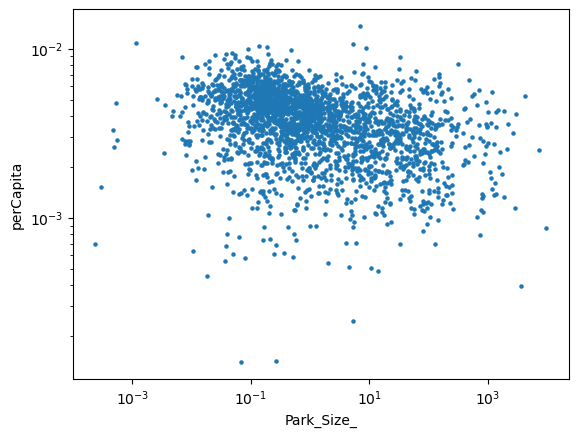

In [117]:
# total deaths - scatter plot log scale of all counties (per capita)
deathCases_total.plot.scatter(x = 'Park_Size_', y = 'perCapita', s = 5, loglog = True)

<Axes: xlabel='Park_Size_', ylabel='2023-04-29'>

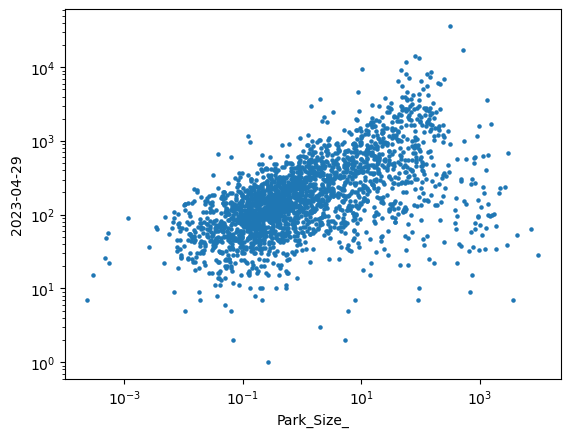

In [118]:
# total deaths - scatter plot log scale of all counties (cumulative)
deathCases_total.plot.scatter(x = 'Park_Size_', y = '2023-04-29', s = 5, loglog = True)

In [127]:
# first phase (end 2020-06-30) - deaths
# cumulative
deaths_1st = deaths_h[['countyFIPS', 'County Name', 'State','2020-06-30']]
deaths_1st

countyFIPS            County Name State  2020-06-30
0              0  Statewide Unallocated    AL           0
1           1001        Autauga County     AL          12
2           1003        Baldwin County     AL          10
3           1005        Barbour County     AL           1
4           1007           Bibb County     AL           1
...          ...                    ...   ...         ...
3188       56037     Sweetwater County     WY           0
3189       56039          Teton County     WY           1
3190       56041          Uinta County     WY           0
3191       56043       Washakie County     WY           5
3192       56045         Weston County     WY           0

[3193 rows x 4 columns]

In [128]:
# perCap for 1st phase -deaths
deaths_1st = pd.merge(deaths_1st, pop,  how='left', left_on=['countyFIPS'], right_on = ['countyFIPS'])
deaths_1st

countyFIPS          County Name_x State_x  2020-06-30  \
0              0  Statewide Unallocated      AL           0   
1              0  Statewide Unallocated      AL           0   
2              0  Statewide Unallocated      AL           0   
3              0  Statewide Unallocated      AL           0   
4              0  Statewide Unallocated      AL           0   
...          ...                    ...     ...         ...   
5738       56037     Sweetwater County       WY           0   
5739       56039          Teton County       WY           1   
5740       56041          Uinta County       WY           0   
5741       56043       Washakie County       WY           5   
5742       56045         Weston County       WY           0   

              County Name_y State_y  population  
0     Statewide Unallocated      AL           0  
1     Statewide Unallocated      AK           0  
2     Statewide Unallocated      AZ           0  
3     Statewide Unallocated      AR           0  
4     Statewide Unallocated      CA           0  
...                     ...     ...         ...  
5738      Sweetwater County      WY       42343  
5739           Teton County      WY       23464  
5740           Uinta County      WY       20226  
5741        Washakie County      WY        7805  
5742          Weston County      WY        6927  

[5743 rows x 7 columns]

In [130]:
# eliminate 0 values
notUse_d1 = deaths_1st[(deaths_1st['population'] == 0.0)].index
deaths_1st.drop(notUse_d1 , inplace=True)
#deaths_1st

deaths_1st['perCapita'] = deaths_1st['2020-06-30'].div(deaths_1st['population'])
deaths_1st

countyFIPS       County Name_x State_x  2020-06-30      County Name_y  \
51          1001     Autauga County       AL          12     Autauga County   
52          1003     Baldwin County       AL          10     Baldwin County   
53          1005     Barbour County       AL           1     Barbour County   
54          1007        Bibb County       AL           1        Bibb County   
55          1009      Blount County       AL           1      Blount County   
...          ...                 ...     ...         ...                ...   
5738       56037  Sweetwater County       WY           0  Sweetwater County   
5739       56039       Teton County       WY           1       Teton County   
5740       56041       Uinta County       WY           0       Uinta County   
5741       56043    Washakie County       WY           5    Washakie County   
5742       56045      Weston County       WY           0      Weston County   

     State_y  population  perCapita  
51        AL       55869   0.000215  
52        AL      223234   0.000045  
53        AL       24686   0.000041  
54        AL       22394   0.000045  
55        AL       57826   0.000017  
...      ...         ...        ...  
5738      WY       42343   0.000000  
5739      WY       23464   0.000043  
5740      WY       20226   0.000000  
5741      WY        7805   0.000641  
5742      WY        6927   0.000000  

[3142 rows x 8 columns]

In [131]:
deaths_1st = deaths_1st[['countyFIPS', 'County Name_x', 'State_x', '2020-06-30','perCapita']]
deaths_1st

countyFIPS       County Name_x State_x  2020-06-30  perCapita
51          1001     Autauga County       AL          12   0.000215
52          1003     Baldwin County       AL          10   0.000045
53          1005     Barbour County       AL           1   0.000041
54          1007        Bibb County       AL           1   0.000045
55          1009      Blount County       AL           1   0.000017
...          ...                 ...     ...         ...        ...
5738       56037  Sweetwater County       WY           0   0.000000
5739       56039       Teton County       WY           1   0.000043
5740       56041       Uinta County       WY           0   0.000000
5741       56043    Washakie County       WY           5   0.000641
5742       56045      Weston County       WY           0   0.000000

[3142 rows x 5 columns]

In [133]:
# dataframe for first phase with park size and cases (deaths)
firstPhase_d =  pd.merge(deaths_1st, new_df2,  how='left', left_on=['countyFIPS'], right_on = ['fips'])
#firstPhase_d

first_d = firstPhase_d[['countyFIPS', 'County Name_x','State_x','2020-06-30','perCapita','Park_Size_']]
first_d

countyFIPS       County Name_x State_x  2020-06-30  perCapita  \
0           1001     Autauga County       AL          12   0.000215   
1           1003     Baldwin County       AL          10   0.000045   
2           1005     Barbour County       AL           1   0.000041   
3           1007        Bibb County       AL           1   0.000045   
4           1009      Blount County       AL           1   0.000017   
...          ...                 ...     ...         ...        ...   
3137       56037  Sweetwater County       WY           0   0.000000   
3138       56039       Teton County       WY           1   0.000043   
3139       56041       Uinta County       WY           0   0.000000   
3140       56043    Washakie County       WY           5   0.000641   
3141       56045      Weston County       WY           0   0.000000   

      Park_Size_  
0       0.589645  
1       5.641093  
2       0.341511  
3       0.127630  
4       0.082185  
...          ...  
3137    0.138097  
3138    0.037505  
3139    0.167717  
3140    0.066117  
3141    0.015487  

[3142 rows x 6 columns]

<Axes: xlabel='Park_Size_', ylabel='perCapita'>

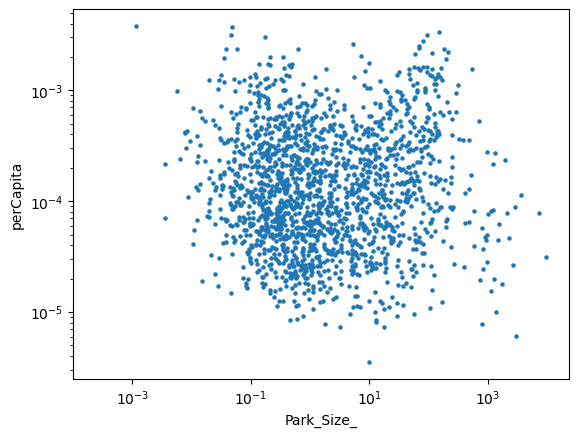

In [134]:
# deaths first phase - scatter plot log scale of all counties (per capita)
first_d.plot.scatter(x = 'Park_Size_', y = 'perCapita', s = 5, loglog = True)

<Axes: xlabel='Park_Size_', ylabel='2020-06-30'>

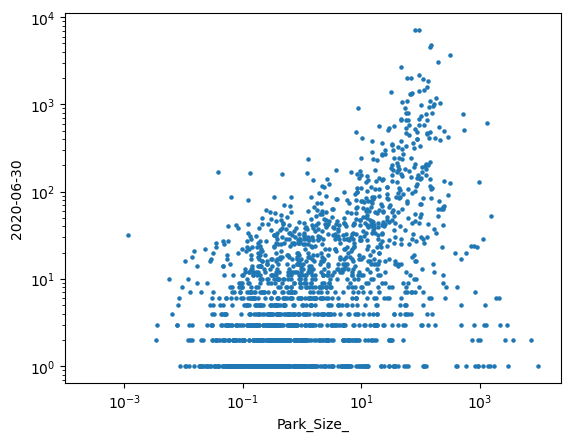

In [135]:
# deaths first phase - scatter plot log scale of all counties (cumulative)
first_d.plot.scatter(x = 'Park_Size_', y = '2020-06-30', s = 5, loglog = True)

In [139]:
#second phase (July 2020 - Nov 2020) - deaths
deaths_2nd = deaths_h[['countyFIPS', 'County Name', 'State','2020-06-30','2020-11-30']]
deaths_2nd

countyFIPS            County Name State  2020-06-30  2020-11-30
0              0  Statewide Unallocated    AL           0           0
1           1001        Autauga County     AL          12          41
2           1003        Baldwin County     AL          10          98
3           1005        Barbour County     AL           1          11
4           1007           Bibb County     AL           1          17
...          ...                    ...   ...         ...         ...
3188       56037     Sweetwater County     WY           0           6
3189       56039          Teton County     WY           1           2
3190       56041          Uinta County     WY           0           4
3191       56043       Washakie County     WY           5           8
3192       56045         Weston County     WY           0           1

[3193 rows x 5 columns]

In [140]:
deaths_2nd['2nd phase'] = deaths_2nd['2020-11-30'].subtract(deaths_2nd['2020-06-30'])
#deaths_2nd

deaths_2nd = deaths_2nd[['countyFIPS', 'County Name', 'State','2nd phase']]
deaths_2nd

C:\Users\VU HONG ANH\AppData\Local\Temp\ipykernel_11900\1079686176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths_2nd['2nd phase'] = deaths_2nd['2020-11-30'].subtract(deaths_2nd['2020-06-30'])


countyFIPS            County Name State  2nd phase
0              0  Statewide Unallocated    AL          0
1           1001        Autauga County     AL         29
2           1003        Baldwin County     AL         88
3           1005        Barbour County     AL         10
4           1007           Bibb County     AL         16
...          ...                    ...   ...        ...
3188       56037     Sweetwater County     WY          6
3189       56039          Teton County     WY          1
3190       56041          Uinta County     WY          4
3191       56043       Washakie County     WY          3
3192       56045         Weston County     WY          1

[3193 rows x 4 columns]

In [141]:
# perCap for 2nd phase (deaths)
deaths_2nd = pd.merge(deaths_2nd, pop,  how='left', left_on=['countyFIPS'], right_on = ['countyFIPS'])
#deaths_2nd

notUse_d2 = deaths_2nd[(deaths_2nd['population'] == 0.0)].index
deaths_2nd.drop(notUse_d2 , inplace=True)
#deaths_2nd

deaths_2nd['perCapita'] = deaths_2nd['2nd phase'].div(deaths_2nd['population'])
deaths_2nd

countyFIPS       County Name_x State_x  2nd phase      County Name_y  \
51          1001     Autauga County       AL         29     Autauga County   
52          1003     Baldwin County       AL         88     Baldwin County   
53          1005     Barbour County       AL         10     Barbour County   
54          1007        Bibb County       AL         16        Bibb County   
55          1009      Blount County       AL         39      Blount County   
...          ...                 ...     ...        ...                ...   
5738       56037  Sweetwater County       WY          6  Sweetwater County   
5739       56039       Teton County       WY          1       Teton County   
5740       56041       Uinta County       WY          4       Uinta County   
5741       56043    Washakie County       WY          3    Washakie County   
5742       56045      Weston County       WY          1      Weston County   

     State_y  population  perCapita  
51        AL       55869   0.000519  
52        AL      223234   0.000394  
53        AL       24686   0.000405  
54        AL       22394   0.000714  
55        AL       57826   0.000674  
...      ...         ...        ...  
5738      WY       42343   0.000142  
5739      WY       23464   0.000043  
5740      WY       20226   0.000198  
5741      WY        7805   0.000384  
5742      WY        6927   0.000144  

[3142 rows x 8 columns]

In [142]:
# dataframe for second phase with park size and cases (deaths)
secondPhase_d =  pd.merge(deaths_2nd, new_df2,  how='left', left_on=['countyFIPS'], right_on = ['fips'])
#secondPhase_d

second_d = secondPhase_d[['countyFIPS', 'County Name_x','State_x','2nd phase','perCapita','Park_Size_']]
second_d

countyFIPS       County Name_x State_x  2nd phase  perCapita  Park_Size_
0           1001     Autauga County       AL         29   0.000519    0.589645
1           1003     Baldwin County       AL         88   0.000394    5.641093
2           1005     Barbour County       AL         10   0.000405    0.341511
3           1007        Bibb County       AL         16   0.000714    0.127630
4           1009      Blount County       AL         39   0.000674    0.082185
...          ...                 ...     ...        ...        ...         ...
3137       56037  Sweetwater County       WY          6   0.000142    0.138097
3138       56039       Teton County       WY          1   0.000043    0.037505
3139       56041       Uinta County       WY          4   0.000198    0.167717
3140       56043    Washakie County       WY          3   0.000384    0.066117
3141       56045      Weston County       WY          1   0.000144    0.015487

[3142 rows x 6 columns]

<Axes: xlabel='Park_Size_', ylabel='perCapita'>

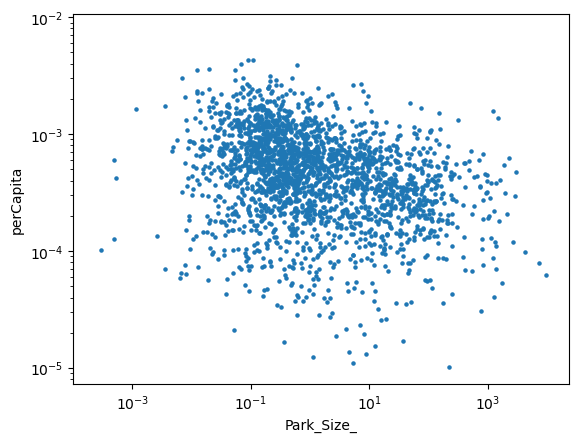

In [143]:
# deaths second phase - scatter plot log scale of all counties (per capita)
second_d.plot.scatter(x = 'Park_Size_', y = 'perCapita', s = 5, loglog = True)

<Axes: xlabel='Park_Size_', ylabel='2nd phase'>

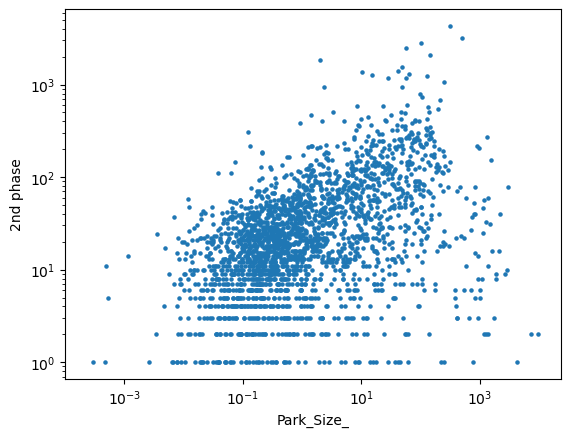

In [144]:
# deaths second phase - scatter plot log scale of all counties (cumulative)
second_d.plot.scatter(x = 'Park_Size_', y = '2nd phase', s = 5, loglog = True)

In [145]:
#third phase (Dec 2020 - March 2021) - deaths
deaths_3rd = deaths_h[['countyFIPS', 'County Name', 'State','2020-11-30', '2021-03-31']]
deaths_3rd

countyFIPS            County Name State  2020-11-30  2021-03-31
0              0  Statewide Unallocated    AL           0           0
1           1001        Autauga County     AL          41          99
2           1003        Baldwin County     AL          98         301
3           1005        Barbour County     AL          11          55
4           1007           Bibb County     AL          17          60
...          ...                    ...   ...         ...         ...
3188       56037     Sweetwater County     WY           6          37
3189       56039          Teton County     WY           2           9
3190       56041          Uinta County     WY           4          12
3191       56043       Washakie County     WY           8          26
3192       56045         Weston County     WY           1           5

[3193 rows x 5 columns]

In [147]:
deaths_3rd['3rd phase'] = cases_3rd['2021-03-31'].subtract(cases_3rd['2020-11-30'])
#deaths_3rd

deaths_3rd = deaths_3rd[['countyFIPS', 'County Name', 'State','3rd phase']]
deaths_3rd

C:\Users\VU HONG ANH\AppData\Local\Temp\ipykernel_11900\3422277355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths_3rd['3rd phase'] = cases_3rd['2021-03-31'].subtract(cases_3rd['2020-11-30'])


countyFIPS            County Name State  3rd phase
0              0  Statewide Unallocated    AL          0
1           1001        Autauga County     AL       3809
2           1003        Baldwin County     AL      11615
3           1005        Barbour County     AL       1049
4           1007           Bibb County     AL       1346
...          ...                    ...   ...        ...
3188       56037     Sweetwater County     WY       2134
3189       56039          Teton County     WY       1965
3190       56041          Uinta County     WY       1058
3191       56043       Washakie County     WY        450
3192       56045         Weston County     WY        236

[3193 rows x 4 columns]

In [148]:
# perCap for 3rd phase - deathss
deaths_3rd = pd.merge(deaths_3rd, pop,  how='left', left_on=['countyFIPS'], right_on = ['countyFIPS'])
#deaths_3rd

notUse_d3 = deaths_3rd[(deaths_3rd['population'] == 0.0)].index
deaths_3rd.drop(notUse_d3 , inplace=True)
#deaths_3rd

deaths_3rd['perCapita'] = deaths_3rd['3rd phase'].div(deaths_3rd['population'])
deaths_3rd

countyFIPS       County Name_x State_x  3rd phase      County Name_y  \
51          1001     Autauga County       AL       3809     Autauga County   
52          1003     Baldwin County       AL      11615     Baldwin County   
53          1005     Barbour County       AL       1049     Barbour County   
54          1007        Bibb County       AL       1346        Bibb County   
55          1009      Blount County       AL       3447      Blount County   
...          ...                 ...     ...        ...                ...   
5738       56037  Sweetwater County       WY       2134  Sweetwater County   
5739       56039       Teton County       WY       1965       Teton County   
5740       56041       Uinta County       WY       1058       Uinta County   
5741       56043    Washakie County       WY        450    Washakie County   
5742       56045      Weston County       WY        236      Weston County   

     State_y  population  perCapita  
51        AL       55869   0.068177  
52        AL      223234   0.052031  
53        AL       24686   0.042494  
54        AL       22394   0.060105  
55        AL       57826   0.059610  
...      ...         ...        ...  
5738      WY       42343   0.050398  
5739      WY       23464   0.083745  
5740      WY       20226   0.052309  
5741      WY        7805   0.057655  
5742      WY        6927   0.034070  

[3142 rows x 8 columns]

In [149]:
# dataframe for third phase with park size and cases - deaths
thirdPhase_d =  pd.merge(deaths_3rd, new_df2,  how='left', left_on=['countyFIPS'], right_on = ['fips'])
#thirdPhase_d

third_d = thirdPhase_d[['countyFIPS', 'County Name_x','State_x','3rd phase','perCapita','Park_Size_']]
third_d

countyFIPS       County Name_x State_x  3rd phase  perCapita  Park_Size_
0           1001     Autauga County       AL       3809   0.068177    0.589645
1           1003     Baldwin County       AL      11615   0.052031    5.641093
2           1005     Barbour County       AL       1049   0.042494    0.341511
3           1007        Bibb County       AL       1346   0.060105    0.127630
4           1009      Blount County       AL       3447   0.059610    0.082185
...          ...                 ...     ...        ...        ...         ...
3137       56037  Sweetwater County       WY       2134   0.050398    0.138097
3138       56039       Teton County       WY       1965   0.083745    0.037505
3139       56041       Uinta County       WY       1058   0.052309    0.167717
3140       56043    Washakie County       WY        450   0.057655    0.066117
3141       56045      Weston County       WY        236   0.034070    0.015487

[3142 rows x 6 columns]

<Axes: xlabel='Park_Size_', ylabel='perCapita'>

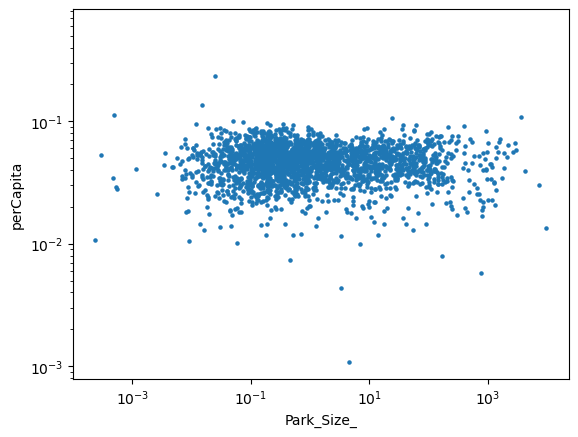

In [150]:
# deaths third phase - scatter plot log scale of all counties (per capita)
third_d.plot.scatter(x = 'Park_Size_', y = 'perCapita', s = 5, loglog = True)

<Axes: xlabel='Park_Size_', ylabel='3rd phase'>

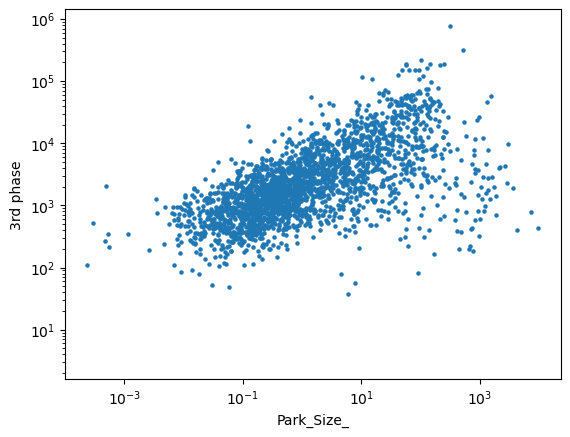

In [151]:
# deaths third phase - scatter plot log scale of all counties (cumulative)
third_d.plot.scatter(x = 'Park_Size_', y = '3rd phase', s = 5, loglog = True)